In [31]:
import numpy as np
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt

# from pvalue_metric import metric #some diffrences as __file__ is not defined for jupyter notebooks
import sys
import os
PACKAGE_DIR = Path(os.getcwd()).resolve().parents[0] / 'pvalue_metric'
sys.path.append(str(PACKAGE_DIR))
import metric
np.set_printoptions(precision=3)

mean p-value: 0.040177274746141425 standard deviation of p-values: 0.13426841961398672
mean significant p-value portion: 0.5219 standard deviation of the significant p-value portion: 0.30297423982906535


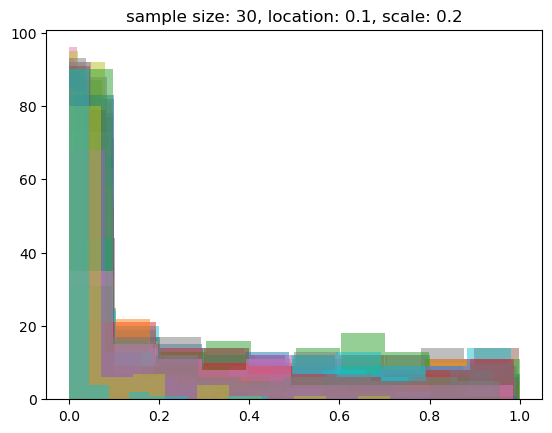

mean p-value: 0.07850182351685499 standard deviation of p-values: 0.17870336394468564
mean significant p-value portion: 0.5298 standard deviation of the significant p-value portion: 0.310666959942637


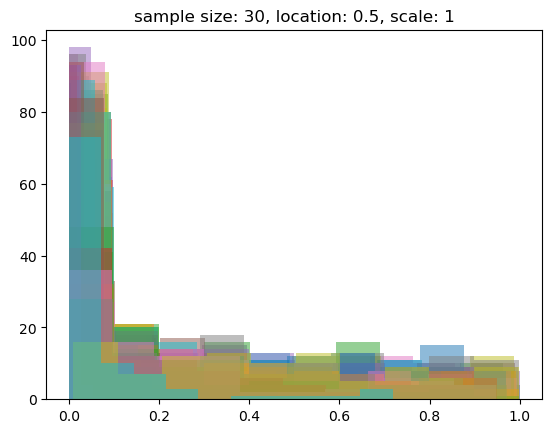

mean p-value: 0.1281532497282015 standard deviation of p-values: 0.22122986588978347
mean significant p-value portion: 0.4589000000000001 standard deviation of the significant p-value portion: 0.2924581850453155


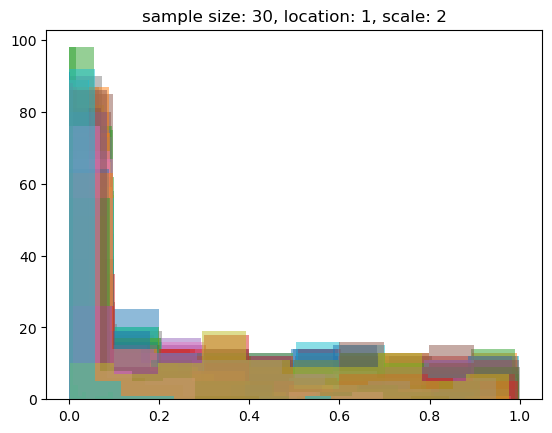

mean p-value: 0.17399383340605382 standard deviation of p-values: 0.2432132950958323
mean significant p-value portion: 0.4706 standard deviation of the significant p-value portion: 0.29852577778141703


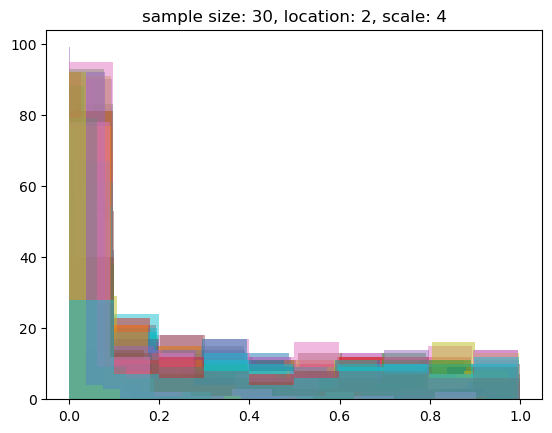

In [5]:
#check p metric performance here and also estimated mean
itr = 100
location = [0.1, 0.5, 1, 2]
n = len(location)
n_bootstrap = 100
n_permutation = 200
sample_size = 30
scale = [0.2, 1, 2, 4]

pvalues = np.zeros((n, itr))
mean_bootstrapped_pvalues = np.zeros((n, itr))
pmetric = np.zeros((n, itr))

for k in range(n):
    portions = np.zeros((itr))
    for i in range(itr):
        
        g1_samples = np.random.normal(loc=0.0, scale=scale[k], size=sample_size)
        g2_samples = np.random.normal(loc=location[k], scale=scale[k], size=sample_size)

        g1_bootstraps = [np.random.choice(g1_samples,len(g1_samples), replace=True) for j in range(n_bootstrap)]
        g2_bootstraps = [np.random.choice(g2_samples, len(g2_samples), replace=True) for j in range(n_bootstrap)]
        bootstrapped_pvalues = [stats.ttest_ind(g1_bootstraps[j],g2_bootstraps[j])[1] for j in range(n_bootstrap)]

        pvalues[k,i] = stats.ttest_ind(g1_samples,g2_samples)[1]
        mean_bootstrapped_pvalues[k,i] = np.mean(bootstrapped_pvalues)
        pmetric[k,i] = metric.pvalue_test([g1_samples,g2_samples], stats.ttest_ind, sample_size, n_permutation)[0][0]

        portions[i] = len(list(filter(lambda p: p< 0.05,bootstrapped_pvalues)))/len(bootstrapped_pvalues)

        plt.hist(bootstrapped_pvalues, alpha=0.5)
        plt.title(f"sample size: {sample_size}, location: {location[k]}, scale: {scale[k]}")

    print(f"mean p-value: {np.mean(pvalues)}", f"standard deviation of p-values: {np.sqrt(np.var(pvalues))}")
    print(f"mean significant p-value portion: {np.mean(portions)}", \
          f"standard deviation of the significant p-value portion: {np.sqrt(np.var(portions))}")
    
    plt.show()

In [6]:
print(f"median pvalue ", *np.median(pvalues, axis=1))
print(f"median p metric ", *np.median(pmetric, axis=1))

median pvalue  0.049447731535820286 0.05602118571067961 0.08939464782266056 0.060085248809011386
median p metric  0.04500000000000004 0.04500000000000004 0.10249999999999998 0.0625


In [7]:
print(f"mean pvalue ", *np.mean(pvalues, axis=1))
print(f"mean bootstrapped pvalue ", *np.mean(mean_bootstrapped_pvalues, axis=1))
print(f"mean p metric ", *np.mean(pmetric, axis=1))


mean pvalue  0.16070909898456567 0.15329819508285428 0.19860570484538603 0.18336233471140914
mean bootstrapped pvalue  0.1801732060857674 0.17770536605566292 0.21025457274367385 0.20555889213376197
mean p metric  0.1589 0.15085 0.20360000000000003 0.19024999999999997


In [8]:
print(f"std pvalue ", *np.std(pvalues, axis=1))
print(f"std of mean bootstrapped pvalue ", *np.std(mean_bootstrapped_pvalues, axis=1))
print(f"std p metric ", *np.std(pmetric, axis=1))   

std pvalue  0.22965511784026776 0.2243222906002741 0.26387439358610754 0.2502416076474169
std of mean bootstrapped pvalue  0.15220706613268936 0.1503969352429134 0.15415495504827575 0.15467352156714567
std p metric  0.22052163159200502 0.22568125199050096 0.2687173980225322 0.2648984475228196


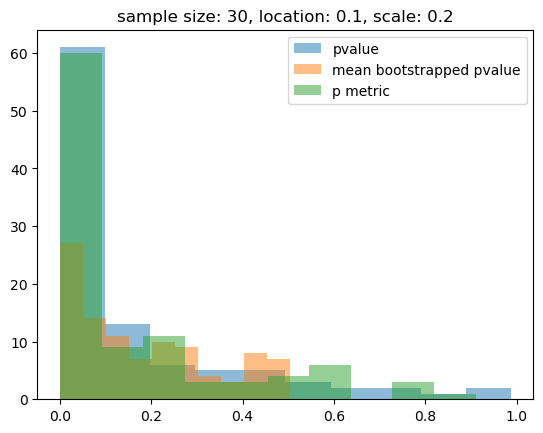

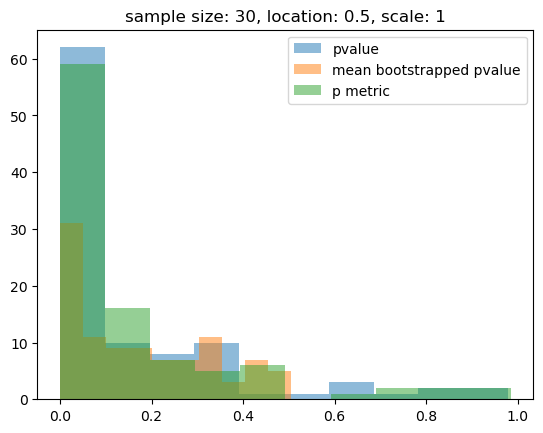

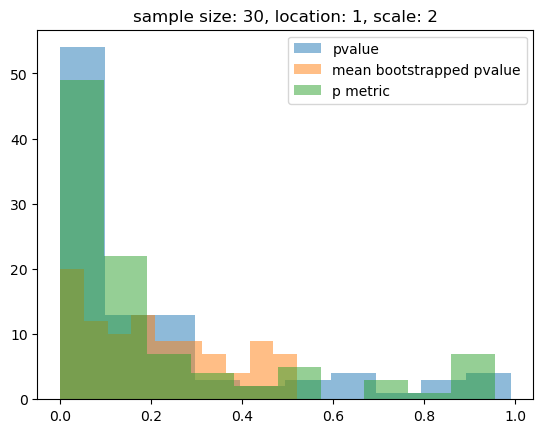

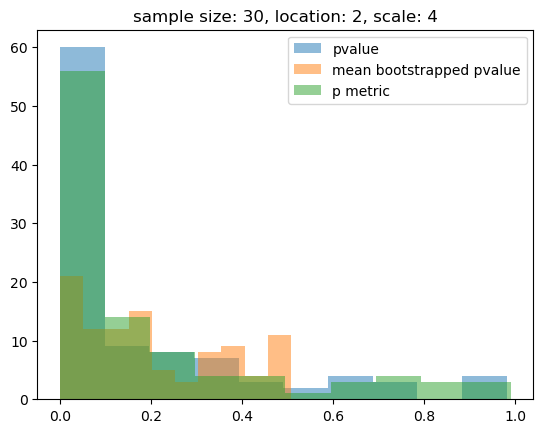

In [9]:
for k in range(n):
    plt.hist(pvalues[k,:], alpha=0.5, label="pvalue")
    plt.hist(mean_bootstrapped_pvalues[k,:], alpha=0.5, label="mean bootstrapped pvalue")
    plt.hist(pmetric[k,:], alpha=0.5, label="p metric")
    plt.legend()
    plt.title(f"sample size: {sample_size}, location: {location[k]}, scale: {scale[k]}")
    plt.show()

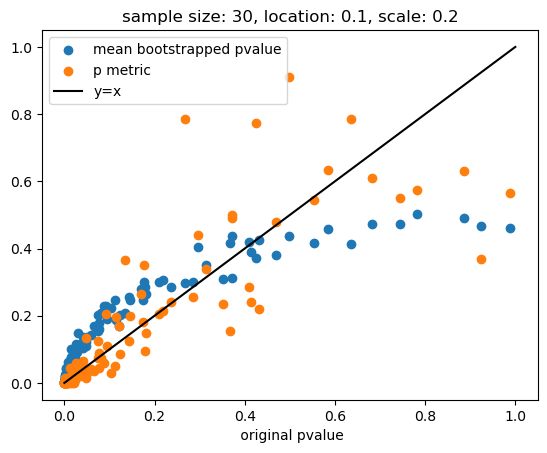

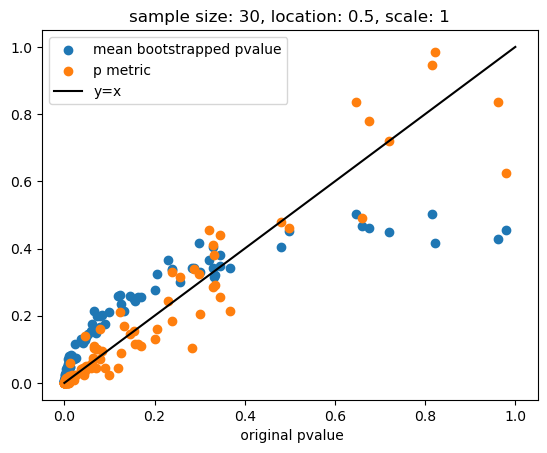

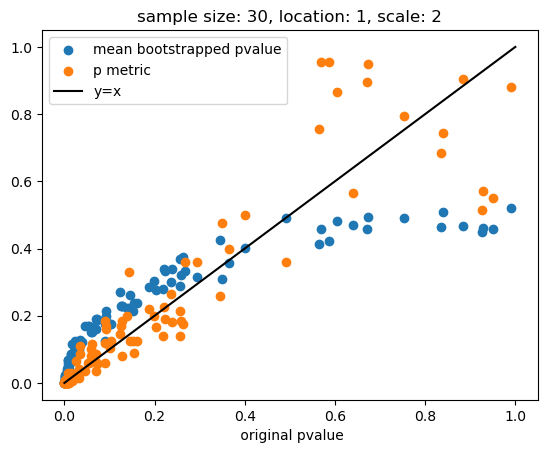

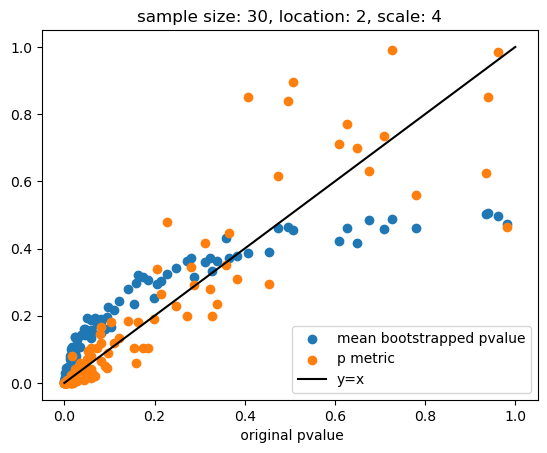

In [10]:
for k in range(n):
    plt.scatter(pvalues[k,:], mean_bootstrapped_pvalues[k,:], label="mean bootstrapped pvalue")
    plt.scatter(pvalues[k,:], pmetric[k,:], label="p metric")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), label="y=x", color="black")
    plt.xlabel(" original pvalue")
    plt.legend()
    plt.title(f"sample size: {sample_size}, location: {location[k]}, scale: {scale[k]}")
    plt.show()

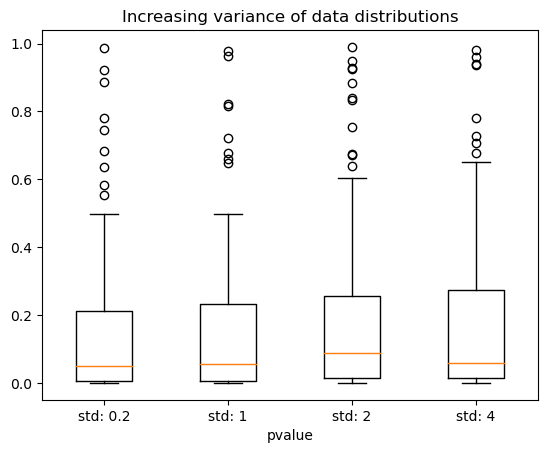

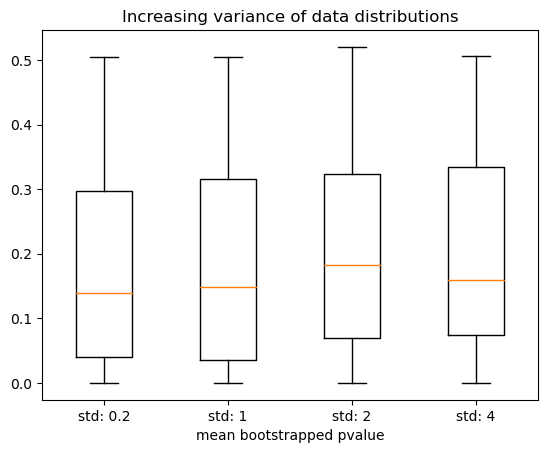

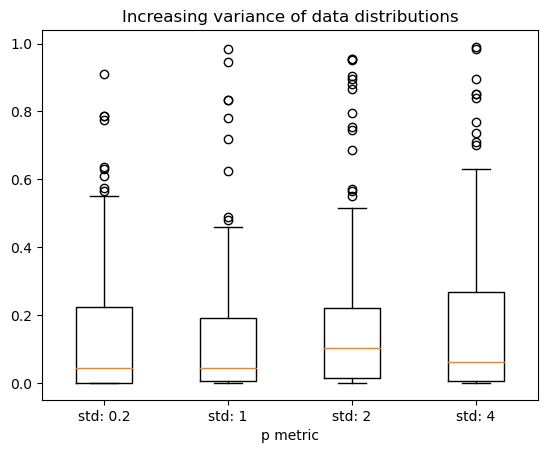

In [11]:
groups = [pvalues, mean_bootstrapped_pvalues, pmetric]
names = ["pvalue", "mean bootstrapped pvalue", "p metric"]
for (i,p) in enumerate(groups):
    plt.boxplot(p.T)
    plt.xlabel(names[i])
    plt.xticks([1,2,3,4], [f"std: {scale[k]}" for k in range(n)])
    plt.title("Increasing variance of data distributions")
    plt.show()


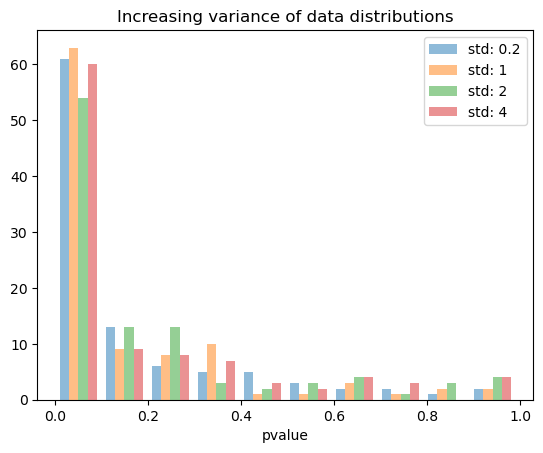

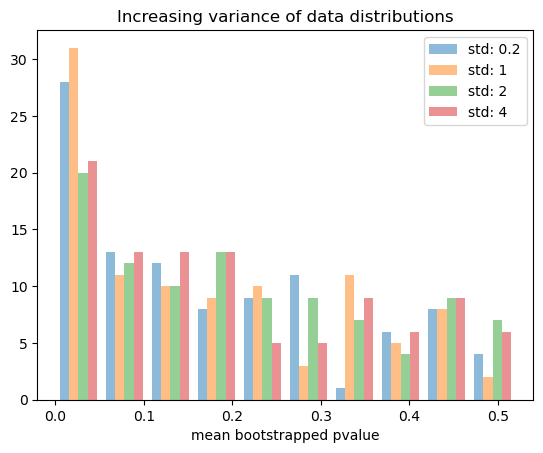

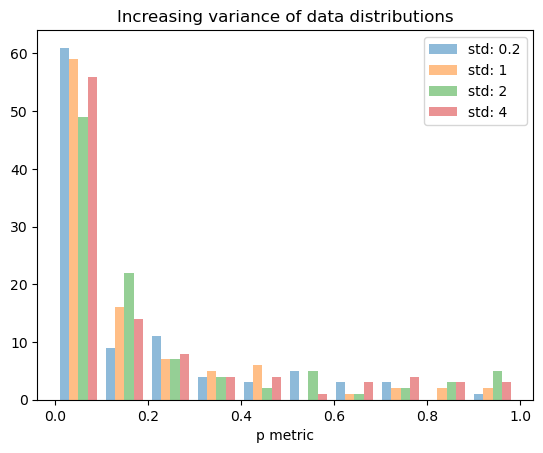

In [14]:
for (i, p) in enumerate(groups):
    plt.hist(p.T, alpha=0.5)
    plt.legend([f"std: {scale[k]}" for k in range(n)])
    plt.xlabel(names[i])
    plt.title("Increasing variance of data distributions")
    plt.xlabel(names[i])
    plt.show()

Student T distribution vs normal

In [26]:
#check p metric performance here and also estimated mean
itr = 100
n_bootstrap = 100
n_permutation = 200
sample_size = 30

pvalues = np.zeros(itr)
mean_bootstrapped_pvalues = np.zeros(itr)
pmetric = np.zeros( itr)

for i in range(itr):

    g1_samples = stats.t.rvs(loc = 1, df = 3, scale = 1, size=sample_size)
    g2_samples = np.random.normal(loc = 0, scale = 1, size=sample_size)

    g1_bootstraps = [np.random.choice(g1_samples,len(g1_samples), replace=True) for j in range(n_bootstrap)]
    g2_bootstraps = [np.random.choice(g2_samples, len(g2_samples), replace=True) for j in range(n_bootstrap)]
    bootstrapped_pvalues = [stats.ttest_ind(g1_bootstraps[j],g2_bootstraps[j])[1] for j in range(n_bootstrap)]

    pvalues[i] = stats.ttest_ind(g1_samples,g2_samples)[1]
    mean_bootstrapped_pvalues[i] = np.mean(bootstrapped_pvalues)
    pmetric[i] = metric.pvalue_test([g1_samples,g2_samples], stats.ttest_ind, sample_size, n_permutation)[0][0]

In [35]:
print(f"mean pvalue ", np.mean(pvalues))
print(f"mean bootstrapped mean pvalue ", np.mean(mean_bootstrapped_pvalues))
print(f"mean p metric ", np.mean(pmetric))

mean pvalue  0.038270163817065724
mean bootstrapped mean pvalue  0.06275301226537477
mean p metric  0.05060000000000001


In [36]:
print(f"std pvalue ", np.std(pvalues))
print(f"std of mean bootstrapped mean pvalue ", np.std(mean_bootstrapped_pvalues))
print(f"std p metric ", np.std(pmetric))

std pvalue  0.11107318952476103
std of mean bootstrapped mean pvalue  0.09547212259904858
std p metric  0.15152933709351465


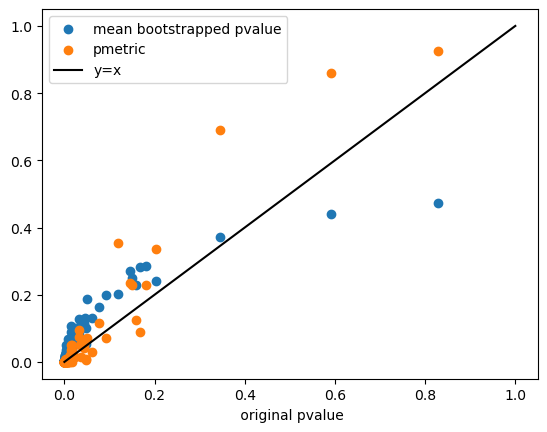

In [27]:
plt.scatter(pvalues, mean_bootstrapped_pvalues, label="mean bootstrapped pvalue")
plt.scatter(pvalues, pmetric, label="pmetric")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), label="y=x", color="black")
plt.xlabel(" original pvalue")
plt.legend()
plt.show()

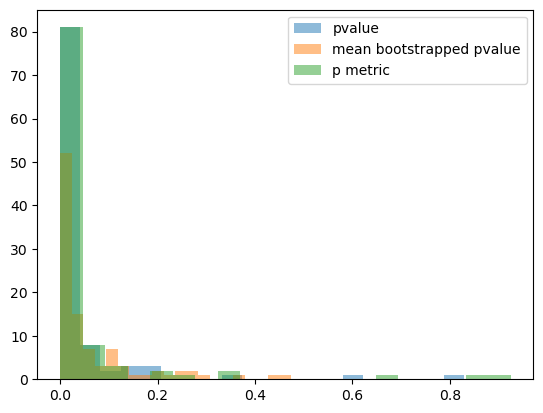

In [28]:
plt.hist(pvalues, alpha=0.5, label="pvalue", bins=20)
plt.hist(mean_bootstrapped_pvalues, alpha=0.5, label="mean bootstrapped pvalue", bins=20)
plt.hist(pmetric, alpha=0.5, label="p metric", bins=20)
plt.legend()
plt.show()  

In [16]:
#check p metric performance here and also estimated mean
itr = 100
location = [0.1, 0.5, 1, 2]
n = len(location)
n_bootstrap = 100
n_permutation = 200
sample_size = 30
scale = [0.2, 1, 2, 4]

pvalues = np.zeros((n, itr))
mean_bootstrapped_pvalues = np.zeros((n, itr))
pmetric = np.zeros((n, itr))

for k in range(n):
    for i in range(itr):
        
        g1_samples = np.random.normal(loc=0.0, scale=scale[k], size=sample_size)
        g2_samples = np.random.normal(loc = location[k], scale = scale[k], size=sample_size) + .1 * np.random.normal(loc = -3*scale[k]+location[k], scale = 0.5, size=sample_size)

        g1_bootstraps = [np.random.choice(g1_samples,len(g1_samples), replace=True) for j in range(n_bootstrap)]
        g2_bootstraps = [np.random.choice(g2_samples, len(g2_samples), replace=True) for j in range(n_bootstrap)]
        bootstrapped_pvalues = [stats.ttest_ind(g1_bootstraps[j],g2_bootstraps[j])[1] for j in range(n_bootstrap)]

        pvalues[k,i] = stats.ttest_ind(g1_samples,g2_samples)[1]
        mean_bootstrapped_pvalues[k,i] = np.mean(bootstrapped_pvalues)
        pmetric[k,i] = metric.pvalue_test([g1_samples,g2_samples], stats.ttest_ind, sample_size, n_permutation)[0][0]

In [17]:
print(f"median pvalue ", *np.median(pvalues, axis=1))
print(f"median p metric ", *np.median(pmetric, axis=1))

median pvalue  0.31110644891573236 0.33665306671491674 0.1890626908685622 0.39807722390449274
median p metric  0.32749999999999996 0.33499999999999996 0.16500000000000004 0.38


In [23]:
print(f"mean pvalue ", *np.mean(pvalues, axis=1))
print(f"mean of mean bootstrapped pvalues ", *np.mean(mean_bootstrapped_pvalues, axis=1))
print(f"mean p metric ", *np.mean(pmetric, axis=1))

mean pvalue  0.3745040174710281 0.3730070027512713 0.3006807512488248 0.4170277198031726
mean of mean bootstrapped pvalues  0.31574582699933146 0.3144869317265913 0.28479453236768587 0.3490297213116307
mean p metric  0.38325 0.38489999999999996 0.29229999999999995 0.4282500000000001


In [19]:
print(f"std pvalue ", *np.std(pvalues, axis=1))
print(f"std of mean bootstrapped pvalue ", *np.std(mean_bootstrapped_pvalues, axis=1))
print(f"std p metric ", *np.std(pmetric, axis=1))

std pvalue  0.30674084044418065 0.3188817089737031 0.2972124942871475 0.29670007237842383
std of mean bootstrapped pvalue  0.1609915652804906 0.16505678424922676 0.15155554454286707 0.14786620554382188
std p metric  0.31544284347564455 0.32312147870421737 0.28555946841244817 0.31655281944724484


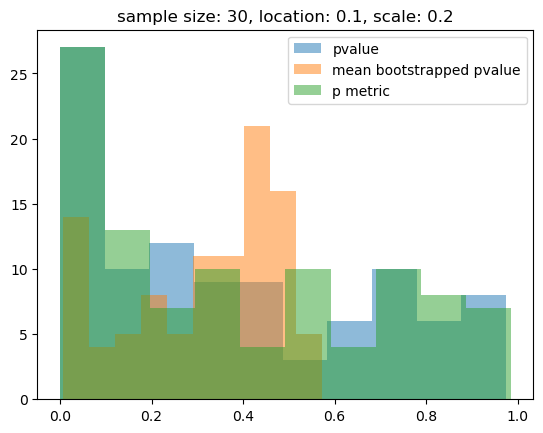

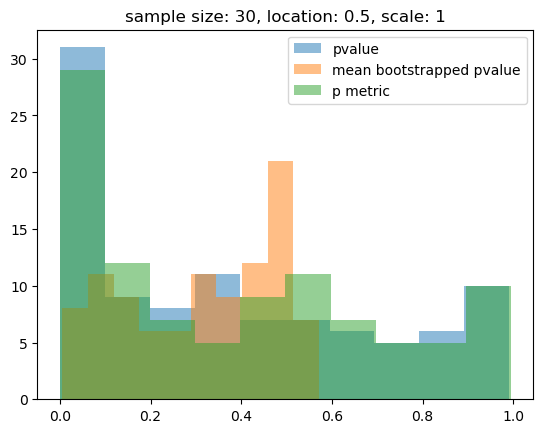

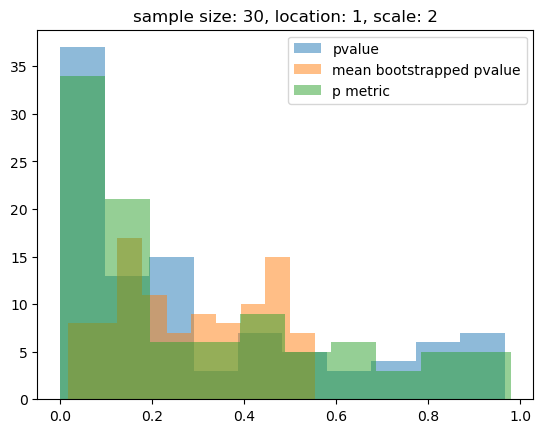

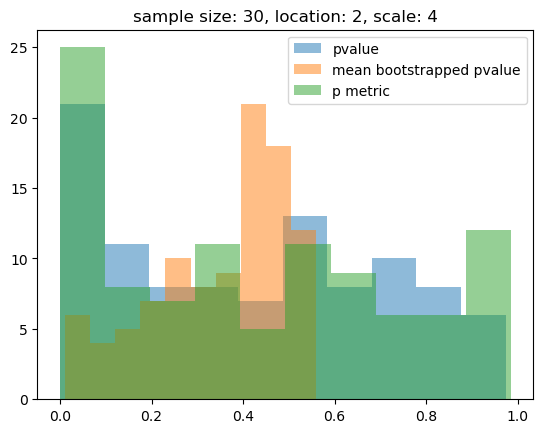

In [20]:
for k in range(n):
    plt.hist(pvalues[k,:], alpha=0.5, label="pvalue")
    plt.hist(mean_bootstrapped_pvalues[k,:], alpha=0.5, label="mean bootstrapped pvalue")
    plt.hist(pmetric[k,:], alpha=0.5, label="p metric")
    plt.legend()
    plt.title(f"sample size: {sample_size}, location: {location[k]}, scale: {scale[k]}")
    plt.show()

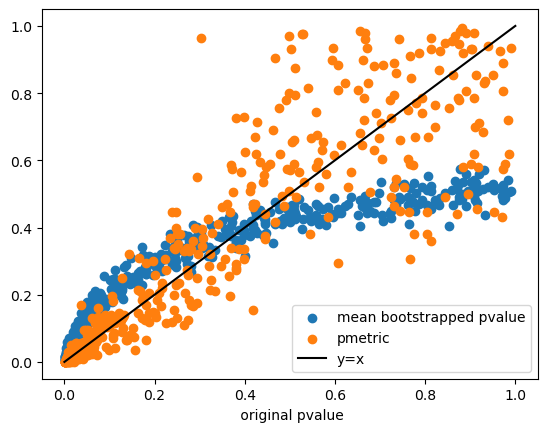

In [21]:
plt.scatter(pvalues, mean_bootstrapped_pvalues, label="mean bootstrapped pvalue")
plt.scatter(pvalues, pmetric, label="pmetric")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), label="y=x", color="black")
plt.xlabel(" original pvalue")
plt.legend()
plt.show()

In [66]:
itr = 100
n_bootstrap = 100
g1_samples_all = np.zeros((itr, sample_size))
g2_samples_all = np.zeros((itr, sample_size))
g1_bootstraps_all = np.zeros((itr, n_bootstrap, sample_size))
g2_bootstraps_all = np.zeros((itr, n_bootstrap, sample_size))

In [67]:
significant_p_idx = []
for i in range(itr):
    
    g1_samples_all[i] = np.random.normal(loc=0.0, scale=1, size=sample_size)
    g2_samples_all[i] = np.random.normal(loc=0.0, scale=1, size=sample_size)

    g1_bootstraps_all[i] = np.vstack([np.random.choice(g1_samples_all[i], sample_size, replace=True) for j in range(n_bootstrap)])
    g2_bootstraps_all[i] = np.vstack([np.random.choice(g2_samples_all[i], sample_size, replace=True) for j in range(n_bootstrap)])
    bootstrapped_pvalues = [stats.ttest_ind(g1_bootstraps_all[i,j],g2_bootstraps_all[i,j])[1] for j in range(n_bootstrap)]

    significant_p_idx.append([j for (j, p) in enumerate(bootstrapped_pvalues) if p < 0.05])

In [114]:
idx = [j for j in range(itr) if len(significant_p_idx[j]) > .05 * n_bootstrap]
len(idx)

76

In [115]:
idx = [j for j in range(itr) if len(significant_p_idx[j]) > .4 * n_bootstrap]
len(idx)

11

++++++++++++++
g1_mean: 0.24884890934628864 g1_std: 0.8922664345423996
g2_mean: -0.34370984481777966 g2_std: 0.9124327196578947


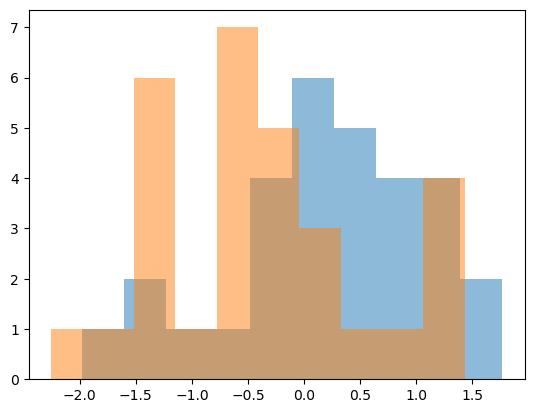

++++++++++++++
g1_mean: -0.25898939377446484 g1_std: 1.011660867881455
g2_mean: 0.12410629725276058 g2_std: 0.8484301666721458


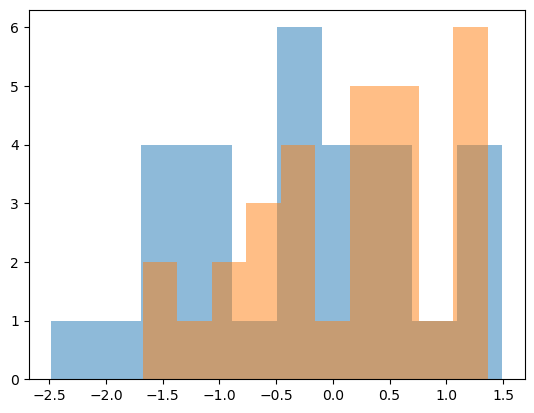

++++++++++++++
g1_mean: -0.07704577903768309 g1_std: 1.0495884303227008
g2_mean: 0.3279719865638514 g2_std: 0.7675930004961977


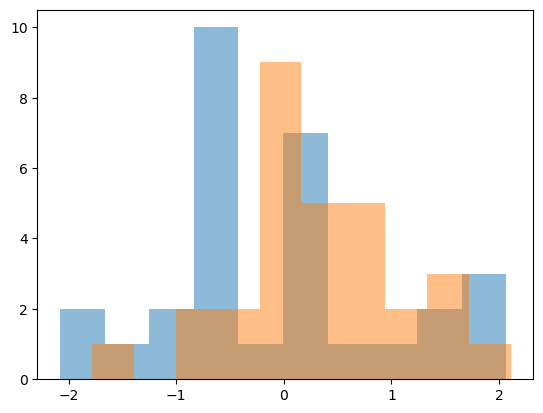

++++++++++++++
g1_mean: 0.010039448345617825 g1_std: 0.9466124220794
g2_mean: -0.4774327513369755 g2_std: 0.7780640599650771


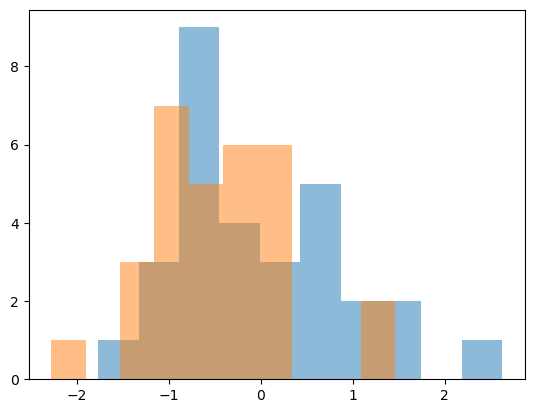

++++++++++++++
g1_mean: -0.08592763141301997 g1_std: 0.792348197412398
g2_mean: 0.2850894606307772 g2_std: 1.0073627242543983


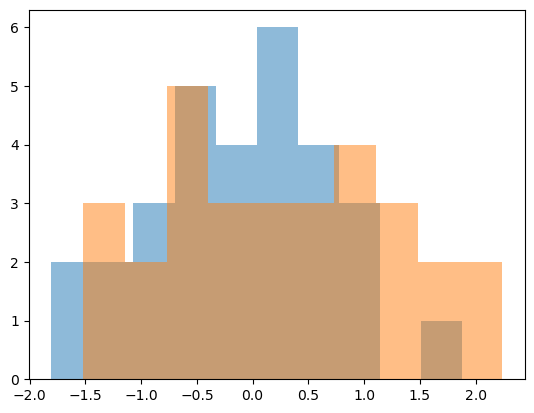

++++++++++++++
g1_mean: 0.32968828646636805 g1_std: 0.9242199680425905
g2_mean: -0.13627115790850527 g2_std: 0.904135988781927


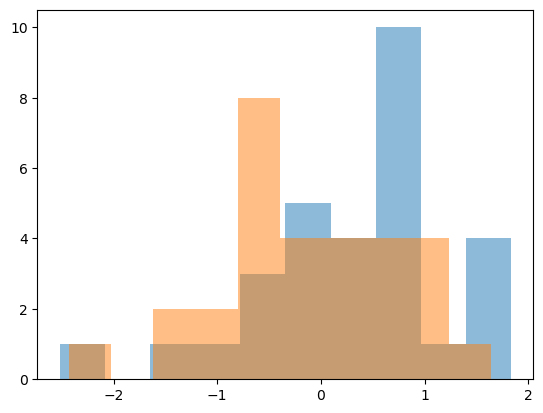

++++++++++++++
g1_mean: 0.1427384095303722 g1_std: 1.0553087138440331
g2_mean: -0.45054356062909 g2_std: 0.938024594023971


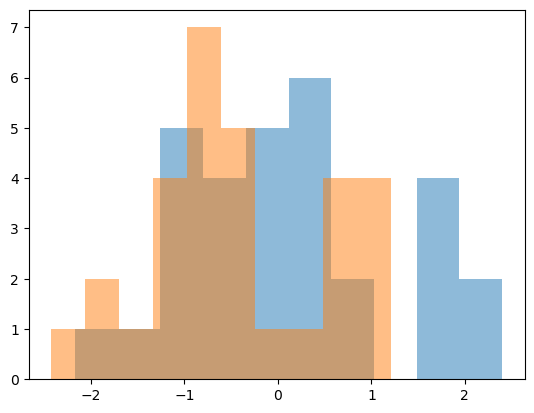

++++++++++++++
g1_mean: -0.19685971531088056 g1_std: 0.8122611289853577
g2_mean: 0.3328080790255176 g2_std: 0.9219989660331116


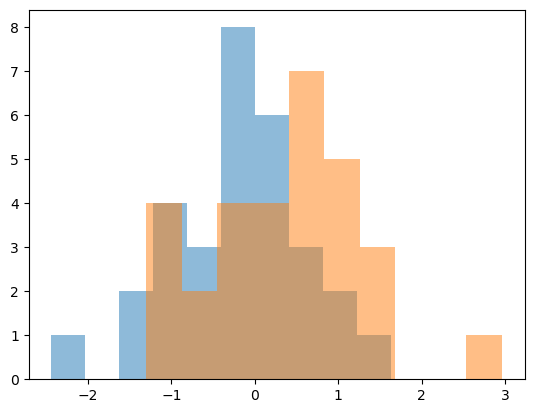

++++++++++++++
g1_mean: -0.25727137802871713 g1_std: 0.922257106215428
g2_mean: 0.2609693226998182 g2_std: 1.00335239820489


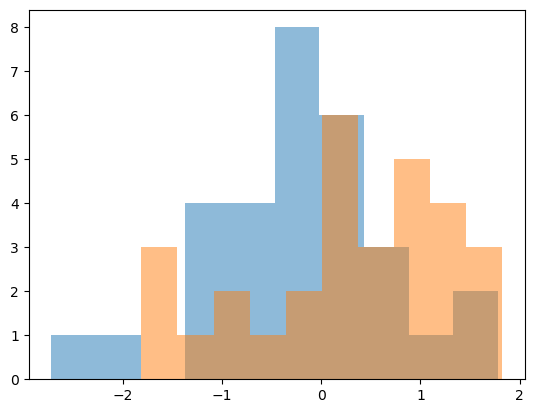

++++++++++++++
g1_mean: 0.4473960317241559 g1_std: 1.0381681711748751
g2_mean: -0.15715973394507834 g2_std: 1.1643200374723326


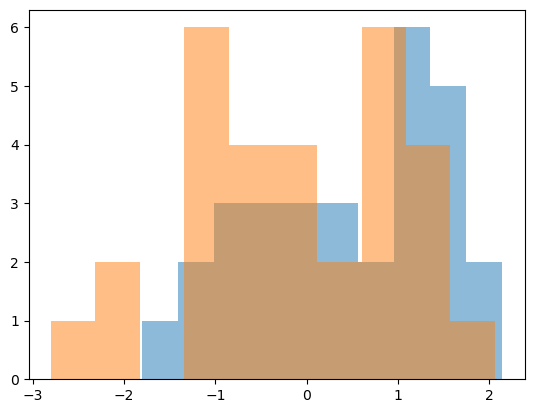

++++++++++++++
g1_mean: 0.218538701035937 g1_std: 0.7208530728290922
g2_mean: -0.1784338968142845 g2_std: 1.1125028988453796


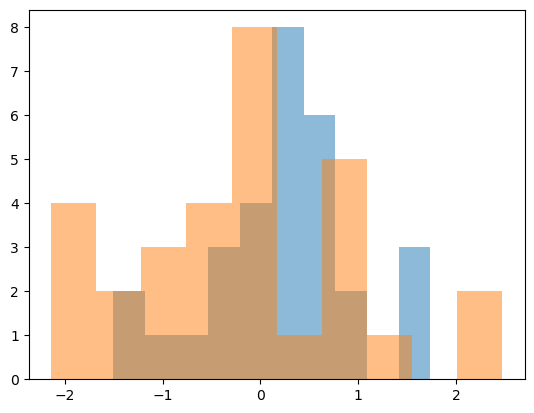

In [118]:
for i in idx:
    print("++++++++++++++")
    print(f"g1_mean: {np.mean(g1_samples_all[i])}", f"g1_std: {np.std(g1_samples_all[i])}")
    print(f"g2_mean: {np.mean(g2_samples_all[i])}", f"g2_std: {np.std(g2_samples_all[i])}")
    plt.hist(g1_samples_all[i], alpha=0.5, bins=10)
    plt.hist(g2_samples_all[i], alpha=0.5, bins=10)
    plt.show()


In [125]:
idx_uni = [j for j in range(itr) if len(significant_p_idx[j]) < 0.06 * n_bootstrap]
len(idx_uni)

24

++++++++++++++
g1_mean: -0.023976115096953934 g1_std: 1.0035318942817282
g2_mean: 0.009456210326263885 g2_std: 0.969789940219012


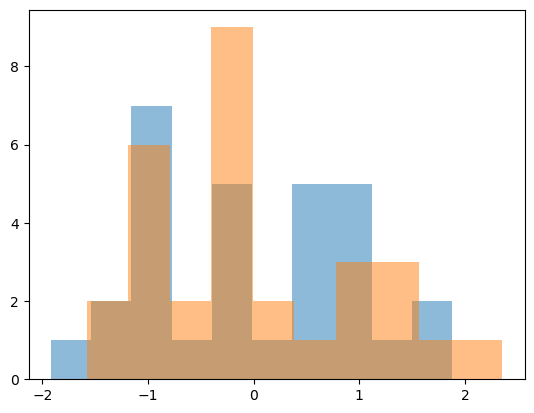

++++++++++++++
g1_mean: 0.1553556835706177 g1_std: 0.9420972266526044
g2_mean: 0.20932336227122272 g2_std: 1.0992996616186703


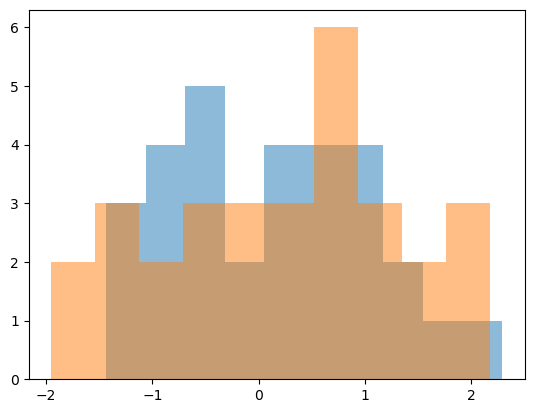

++++++++++++++
g1_mean: 0.21274038953964886 g1_std: 0.8078181616741171
g2_mean: 0.15070191374127762 g2_std: 1.120166656294485


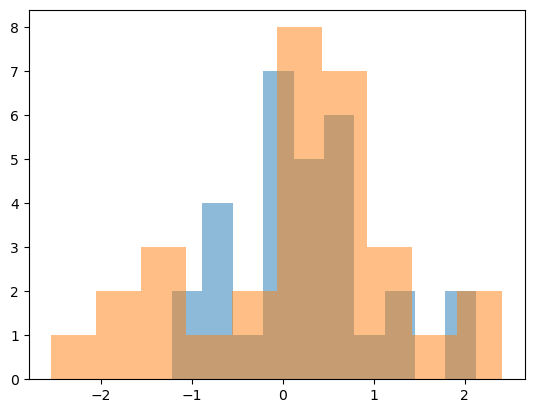

++++++++++++++
g1_mean: -0.2064229829558572 g1_std: 0.8341665731107166
g2_mean: -0.1115290712674704 g2_std: 0.8650141244536103


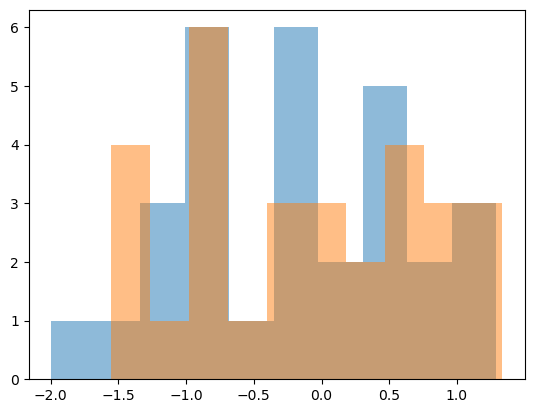

++++++++++++++
g1_mean: 0.31009259276708195 g1_std: 1.268169788219205
g2_mean: 0.17044888605425595 g2_std: 1.10885249007566


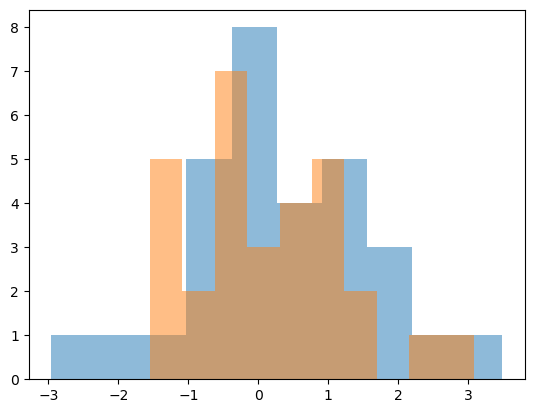

++++++++++++++
g1_mean: -0.08260706324052712 g1_std: 1.022474537021657
g2_mean: -0.021196150957703115 g2_std: 0.8260143869754568


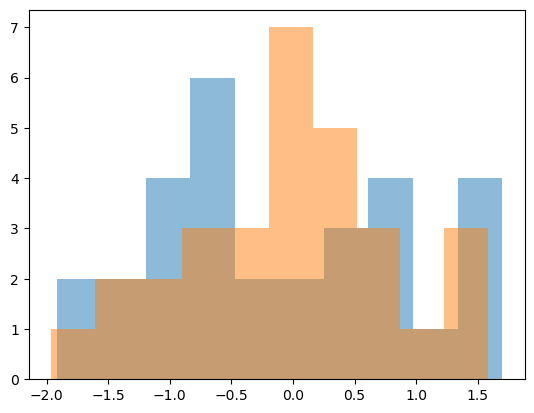

++++++++++++++
g1_mean: 0.011949030537322967 g1_std: 0.8281748284502325
g2_mean: 0.03268377303764089 g2_std: 0.9697487042876328


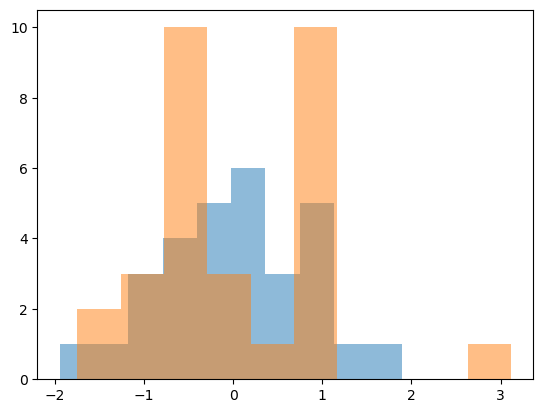

++++++++++++++
g1_mean: 0.07954071435752812 g1_std: 0.9361106331199588
g2_mean: 0.1345735530568117 g2_std: 0.8504604520686885


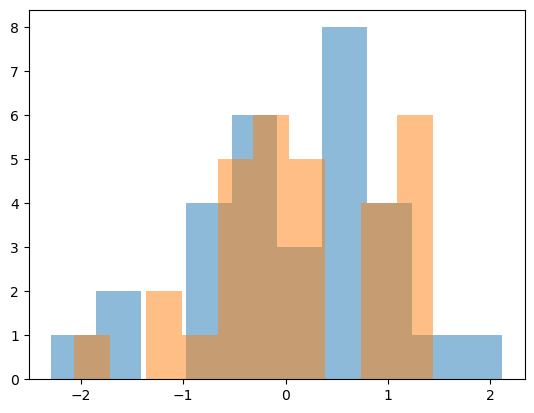

++++++++++++++
g1_mean: 0.07508616886043985 g1_std: 1.090266097752201
g2_mean: -0.0057588703442407 g2_std: 1.0757340732602514


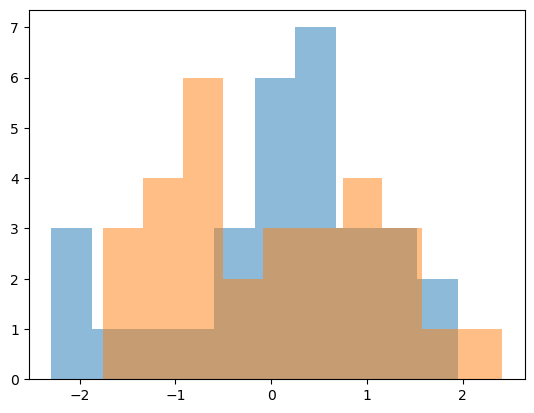

++++++++++++++
g1_mean: -0.0717545978579197 g1_std: 0.8301360738682108
g2_mean: 0.03011603016247682 g2_std: 0.9563700404422023


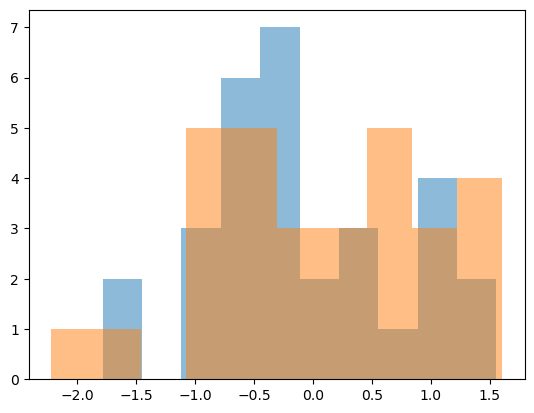

++++++++++++++
g1_mean: 0.23211533526218278 g1_std: 0.8688611633753848
g2_mean: 0.15039144684439038 g2_std: 1.0396058439546987


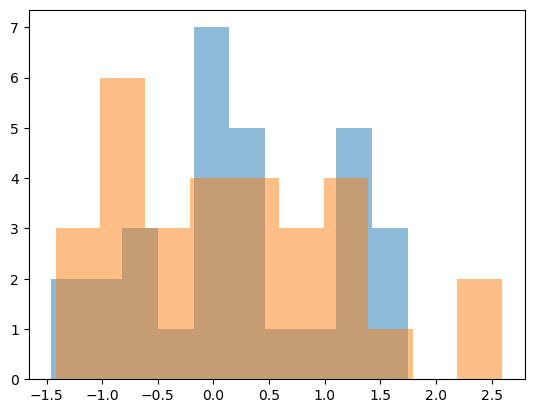

++++++++++++++
g1_mean: -0.25105673367761167 g1_std: 0.8905695582952502
g2_mean: -0.2605549795329422 g2_std: 1.023973888886564


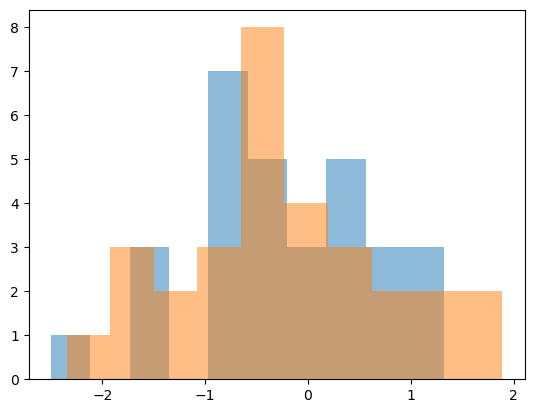

++++++++++++++
g1_mean: -0.18140091959534824 g1_std: 1.1098771670709608
g2_mean: -0.08622228805814333 g2_std: 0.9844597034610224


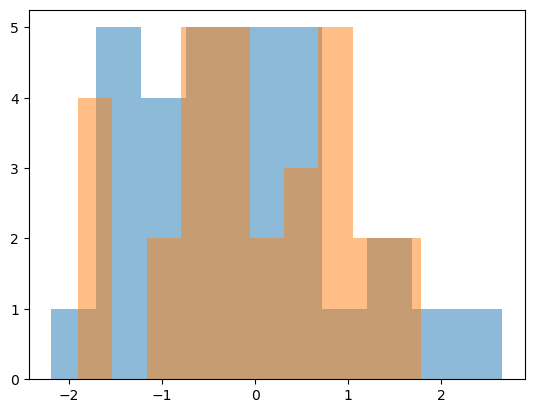

++++++++++++++
g1_mean: -0.012696442153359069 g1_std: 0.9806588490310204
g2_mean: -0.038376763571851734 g2_std: 0.9559766969510914


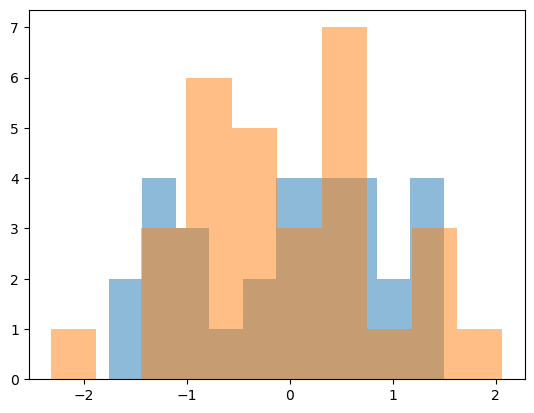

++++++++++++++
g1_mean: 0.07960642341600507 g1_std: 0.7883115732035654
g2_mean: 0.04950675197575129 g2_std: 0.8944490045998181


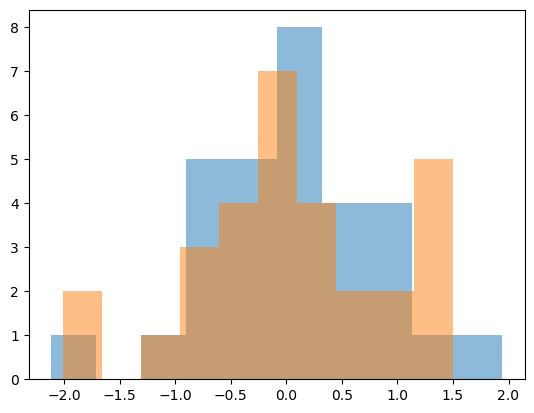

++++++++++++++
g1_mean: -0.012580449586638271 g1_std: 1.1356550118951791
g2_mean: 0.0537024116828053 g2_std: 1.0646882162468028


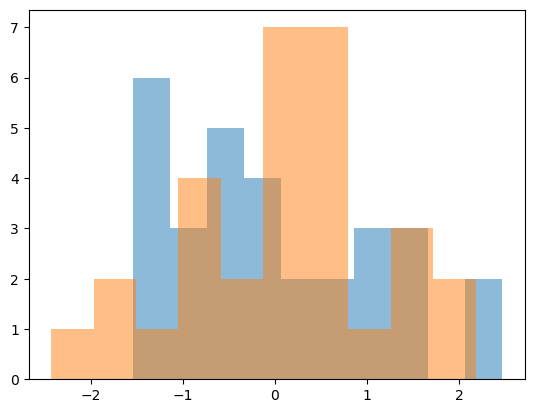

++++++++++++++
g1_mean: 0.02895177549129526 g1_std: 0.9426042015392769
g2_mean: 0.03077697764749087 g2_std: 1.09628855560966


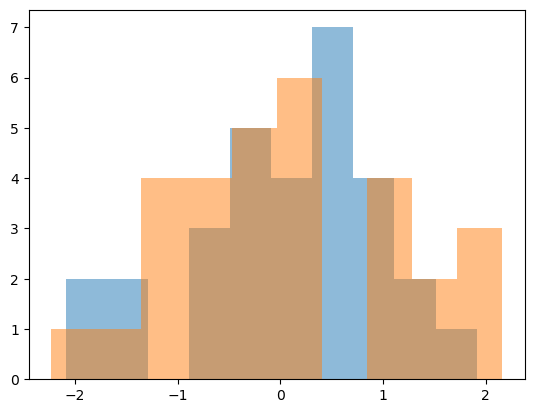

++++++++++++++
g1_mean: 0.2682431179554552 g1_std: 0.8922623088948047
g2_mean: 0.12947890004167714 g2_std: 1.0066896088088633


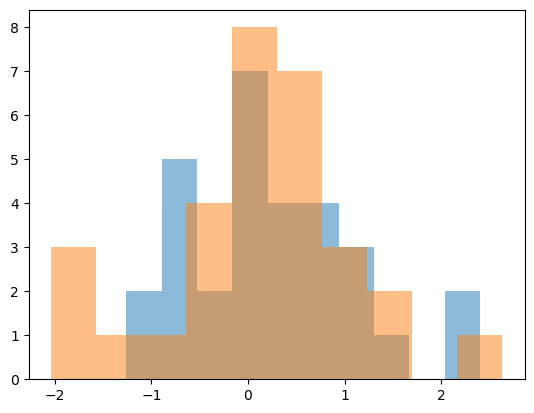

++++++++++++++
g1_mean: 0.37492540020361564 g1_std: 0.9437178865231366
g2_mean: 0.3267170625062078 g2_std: 0.9777654296672454


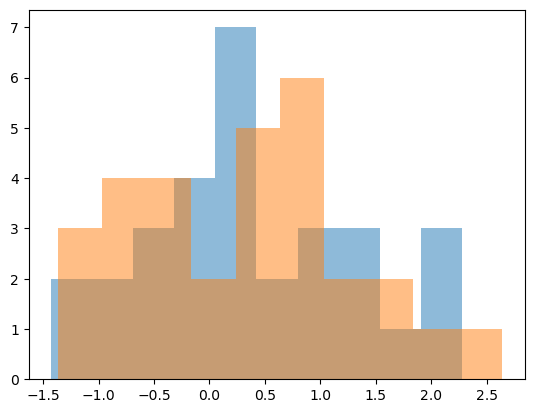

++++++++++++++
g1_mean: -0.04755408494421385 g1_std: 0.8535607362475576
g2_mean: -0.11176134656715966 g2_std: 1.08588622172293


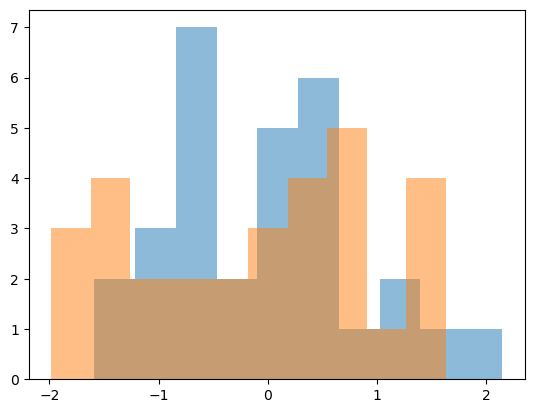

++++++++++++++
g1_mean: -0.07050181291322821 g1_std: 1.012324729034301
g2_mean: -0.05399003681970287 g2_std: 1.121692217807648


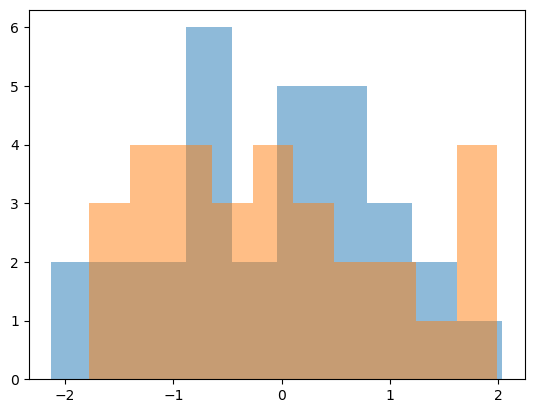

++++++++++++++
g1_mean: 0.15340212232547376 g1_std: 0.7898511340709536
g2_mean: 0.17286365013209454 g2_std: 0.9538056852261757


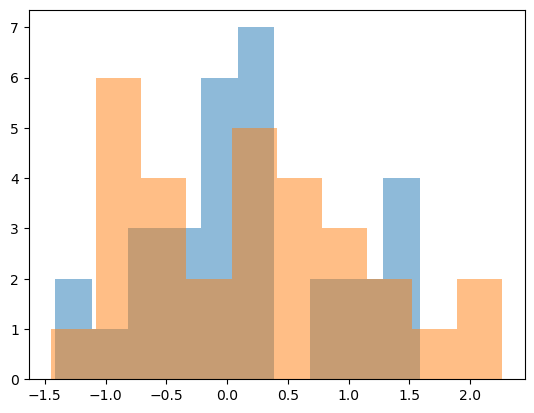

++++++++++++++
g1_mean: 0.04856780960132956 g1_std: 1.1405431745183356
g2_mean: 0.1075080326332437 g2_std: 0.9868103614961582


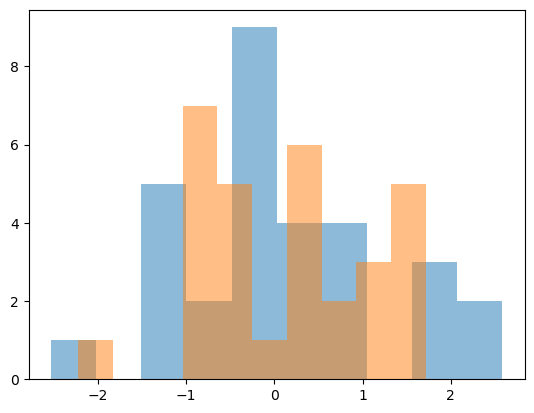

++++++++++++++
g1_mean: -0.23293673877470641 g1_std: 0.9605762128580607
g2_mean: -0.18621106483119623 g2_std: 1.0178586649924628


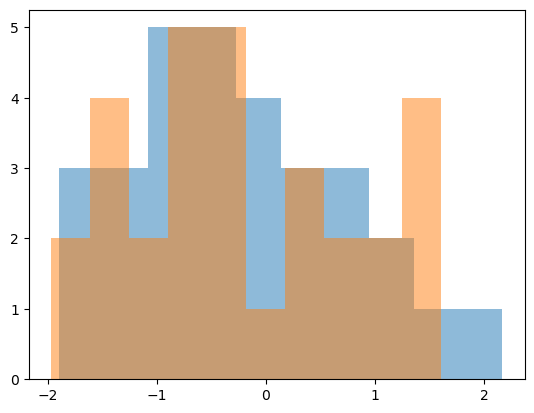

In [126]:
for i in idx_uni:
    print("++++++++++++++")
    print(f"g1_mean: {np.mean(g1_samples_all[i])}", f"g1_std: {np.std(g1_samples_all[i])}")
    print(f"g2_mean: {np.mean(g2_samples_all[i])}", f"g2_std: {np.std(g2_samples_all[i])}")
    plt.hist(g1_samples_all[i], alpha=0.5, bins=10)
    plt.hist(g2_samples_all[i], alpha=0.5, bins=10)
    plt.show()


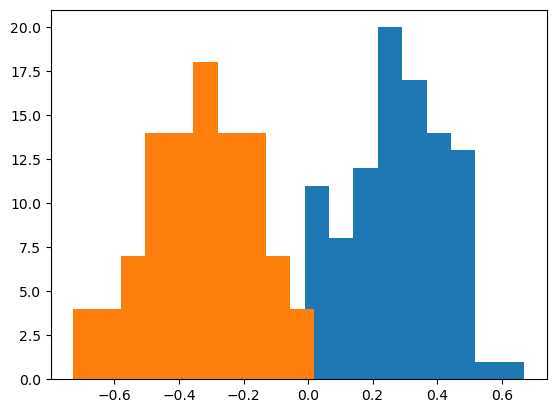

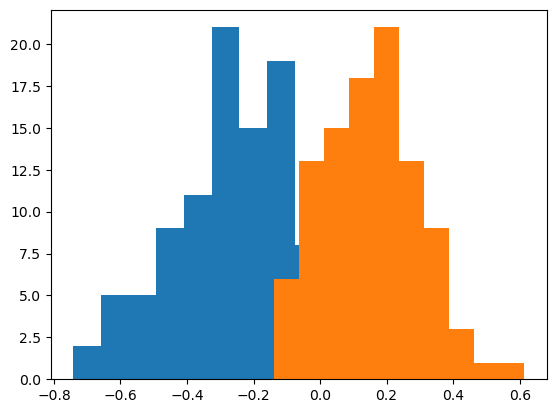

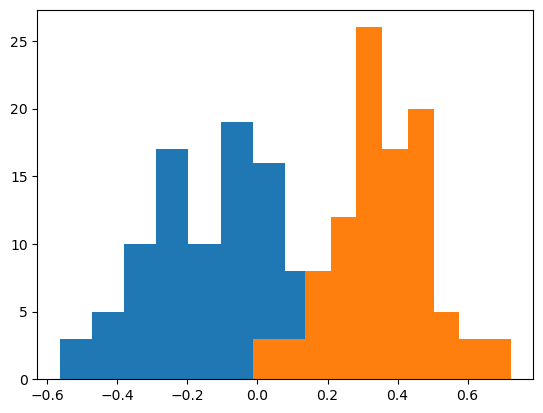

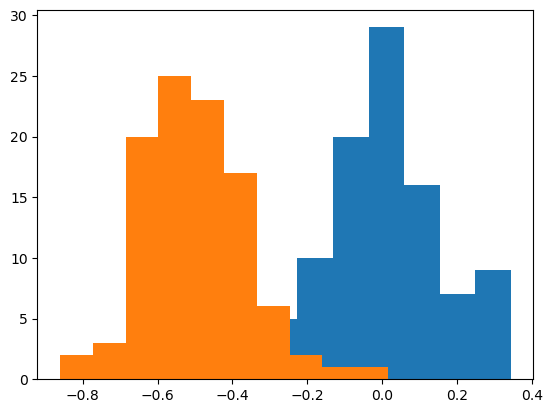

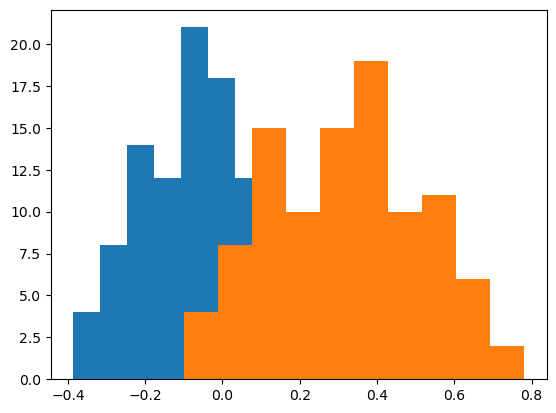

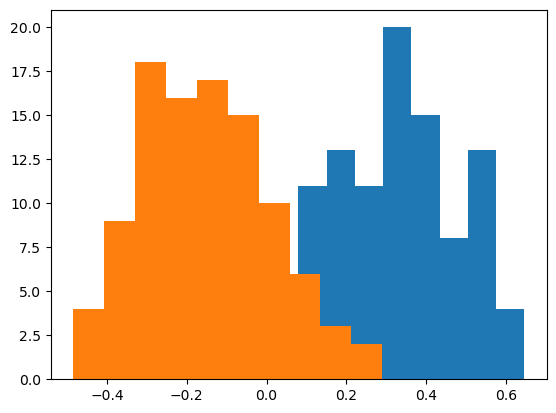

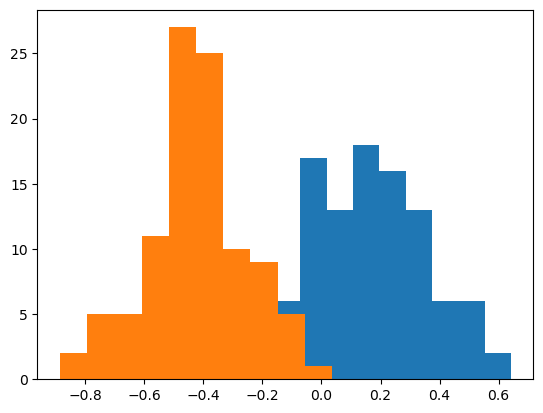

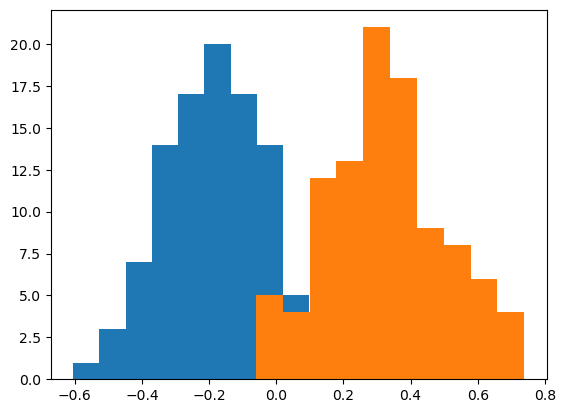

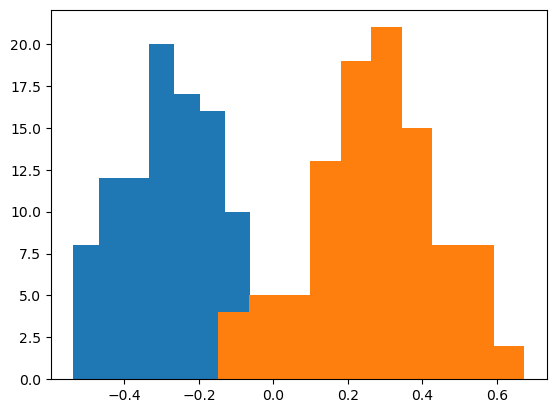

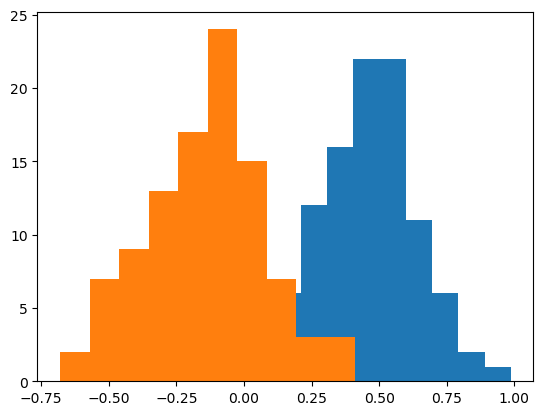

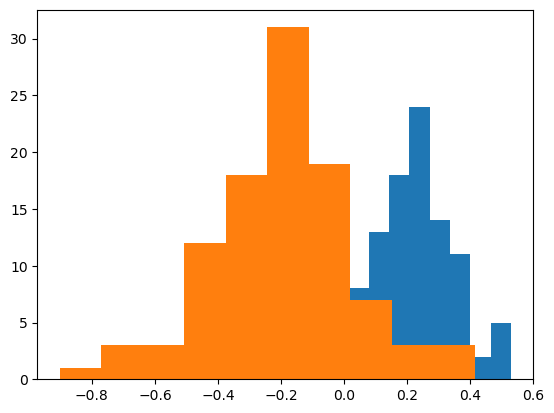

In [144]:
for i in idx:
    _ = plt.hist(np.mean(g1_bootstraps_all[i,:,:], axis=1))
    _ = plt.hist(np.mean(g2_bootstraps_all[i,:,:], axis=1))
    plt.show()

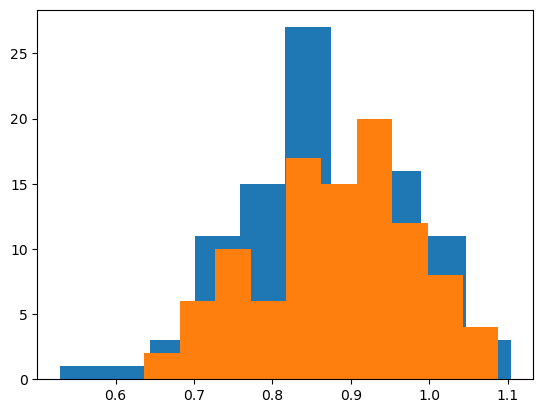

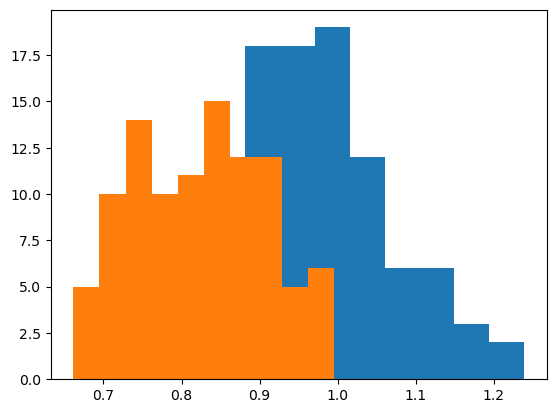

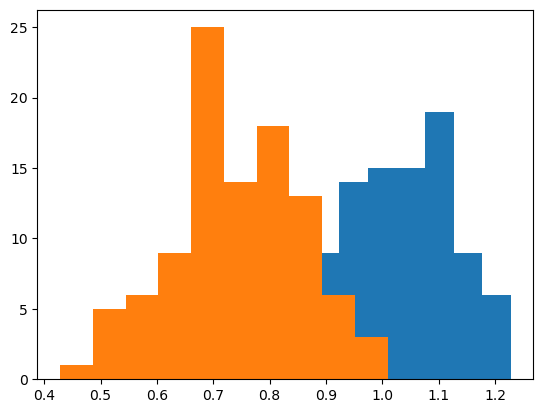

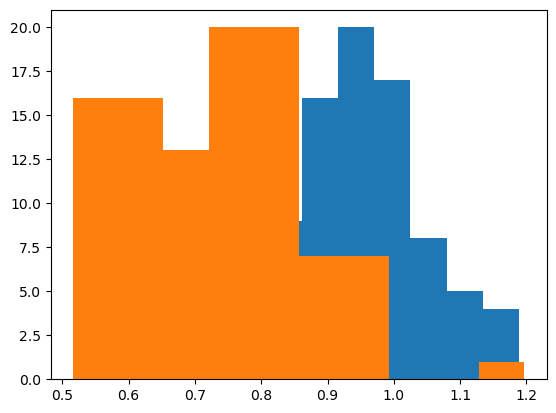

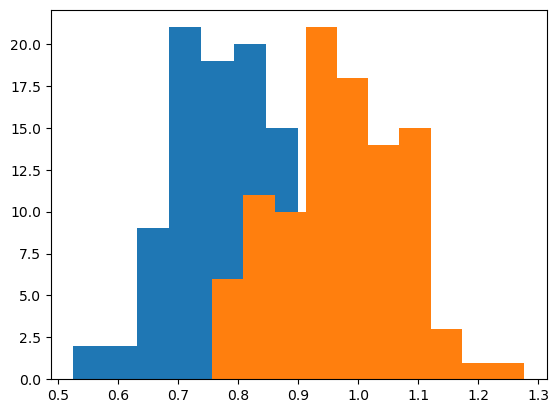

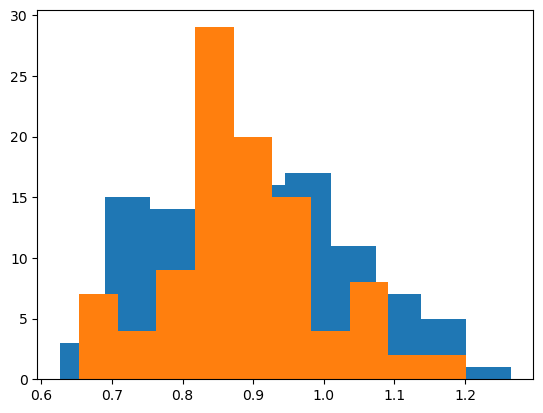

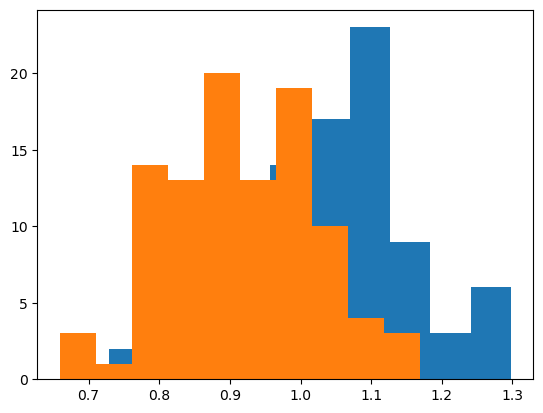

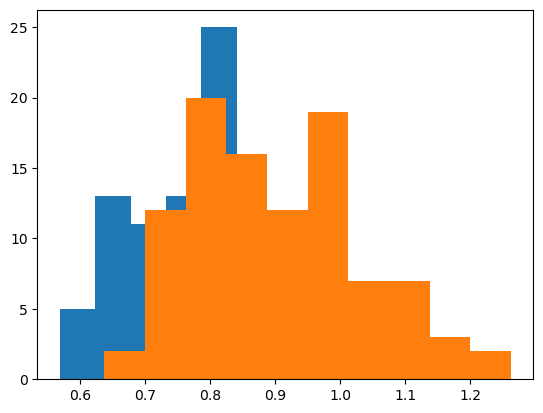

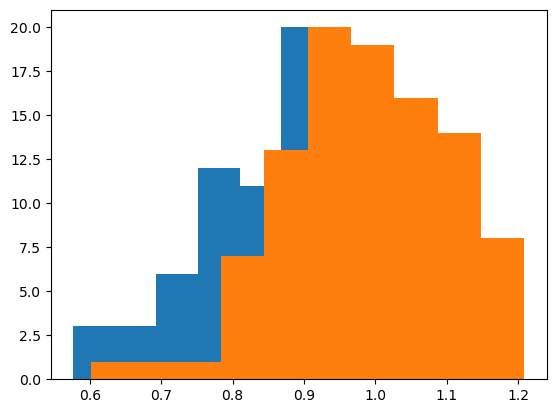

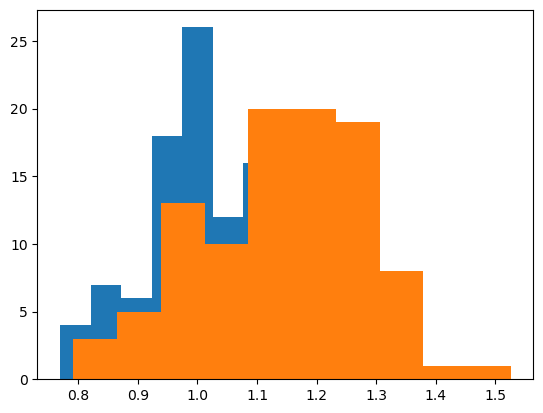

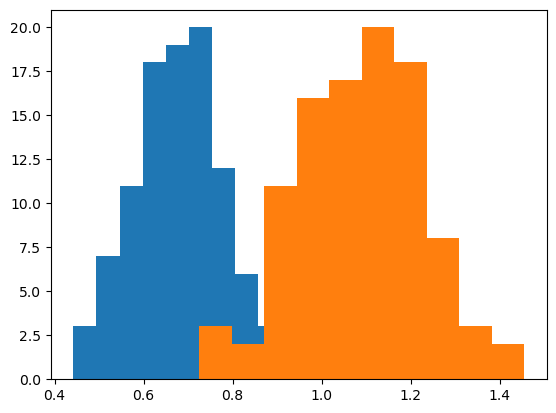

In [145]:
for i in idx:
    _ = plt.hist(np.std(g1_bootstraps_all[i,:,:], axis=1))
    _ = plt.hist(np.std(g2_bootstraps_all[i,:,:], axis=1))
    plt.show()

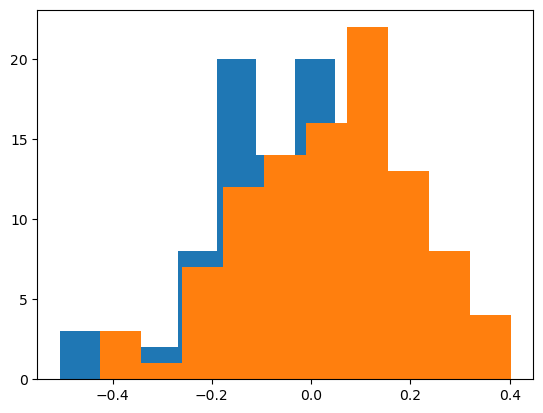

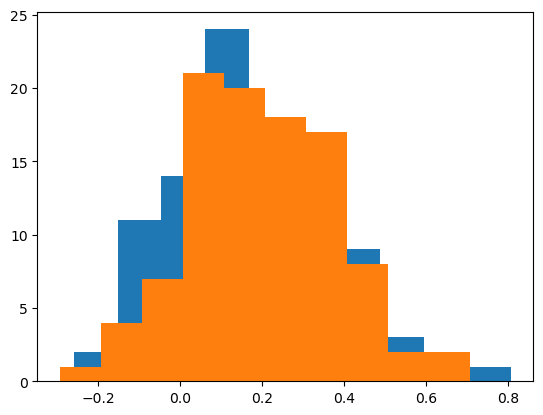

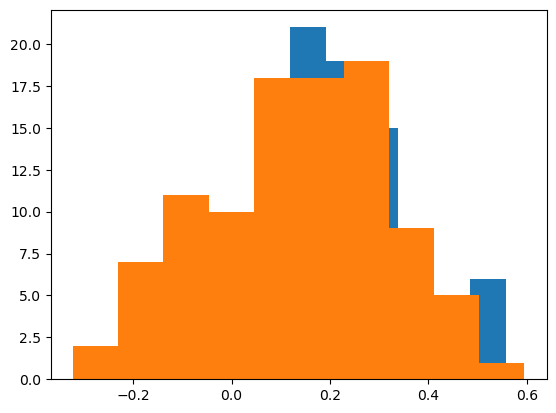

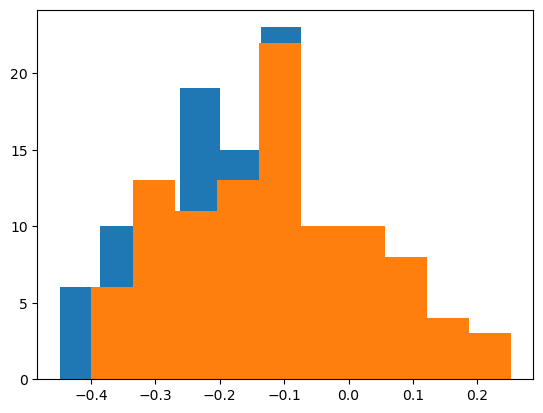

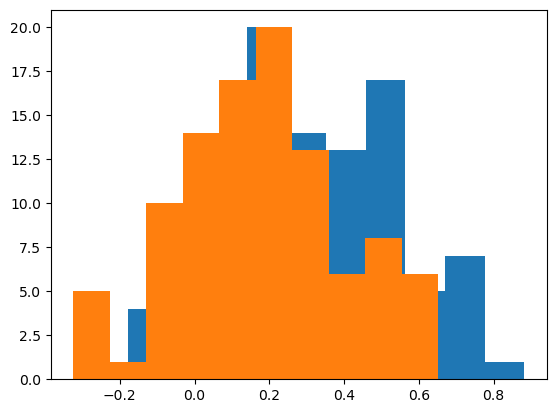

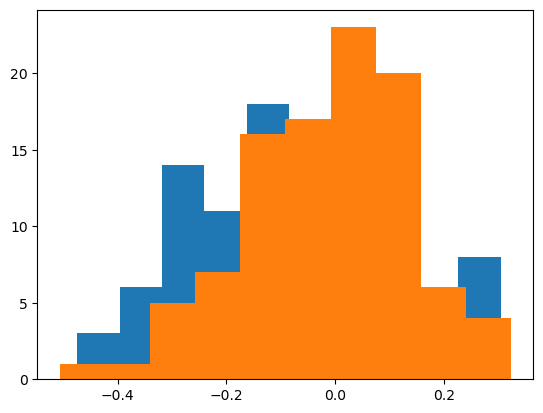

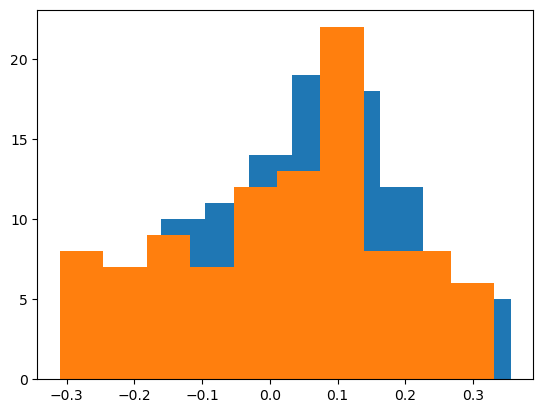

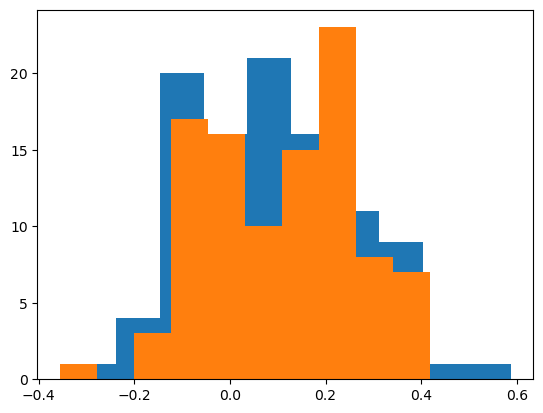

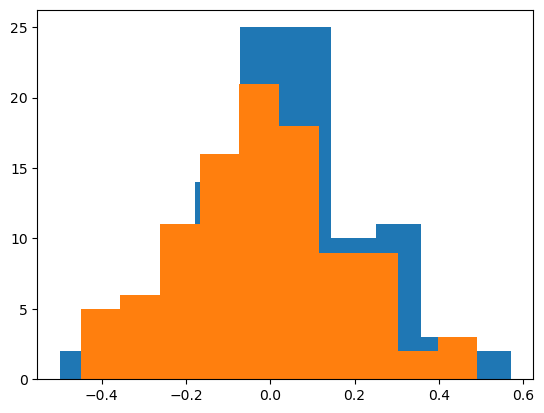

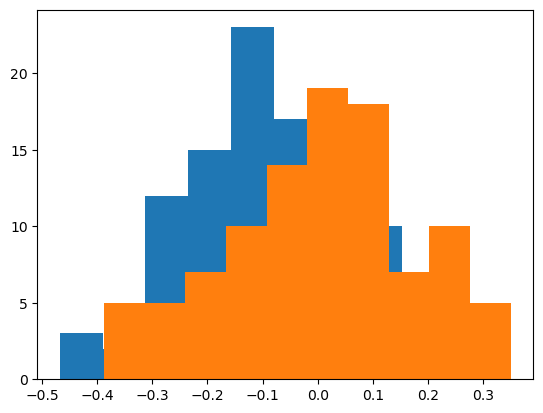

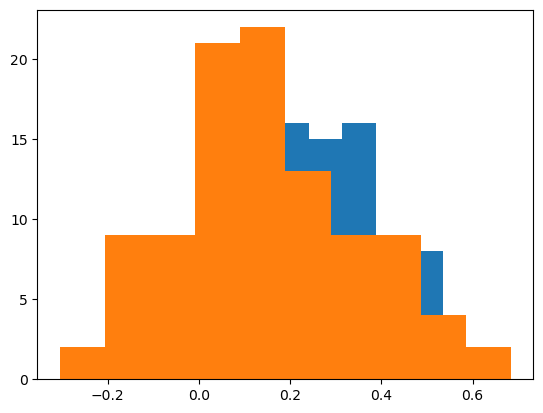

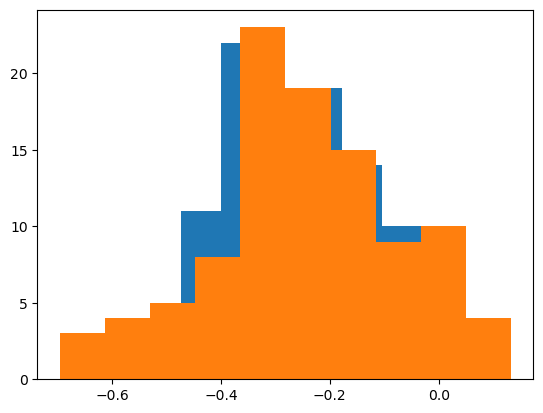

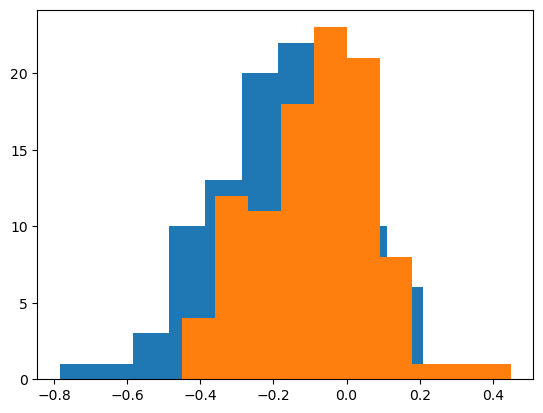

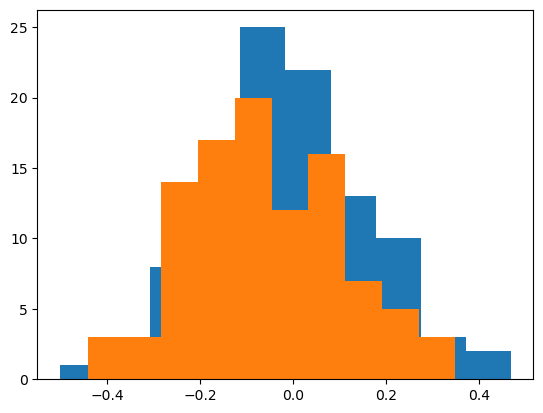

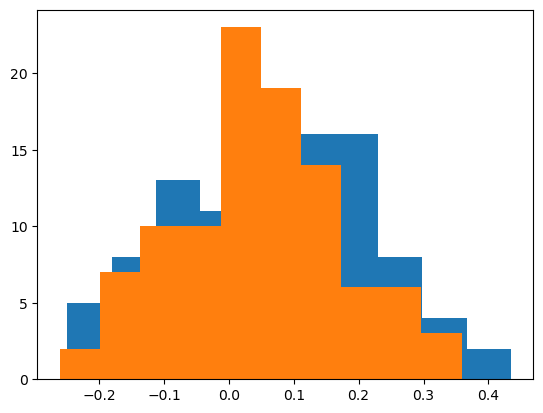

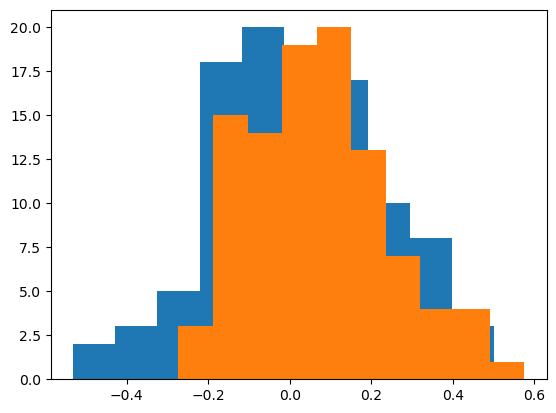

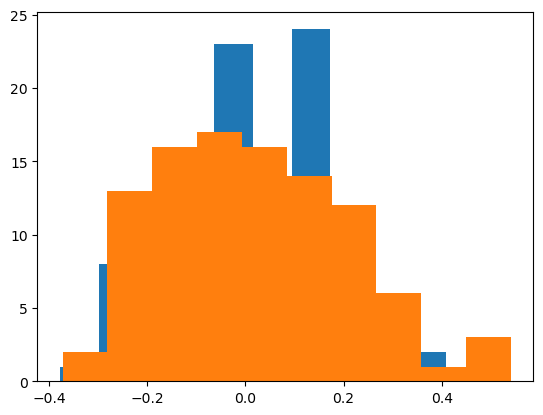

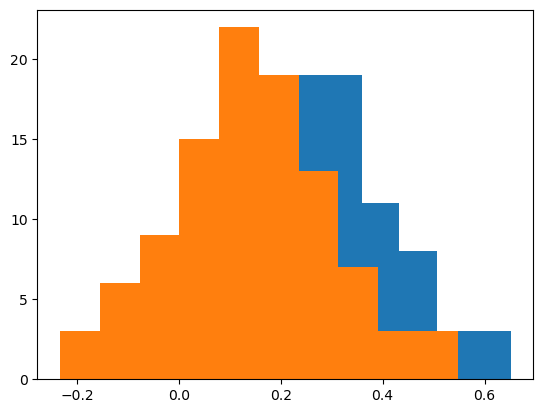

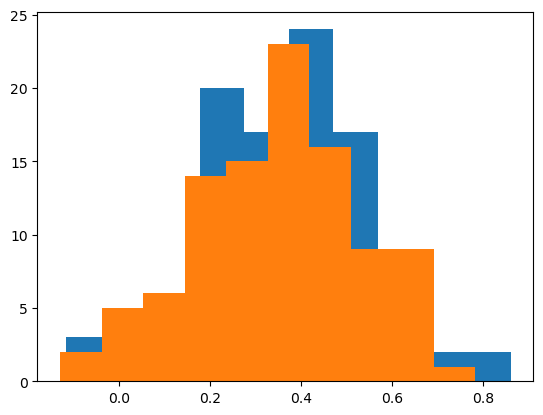

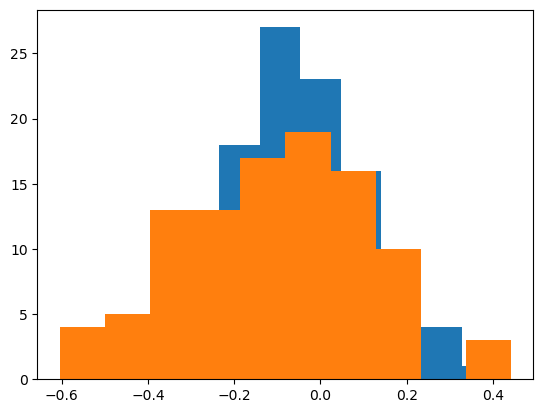

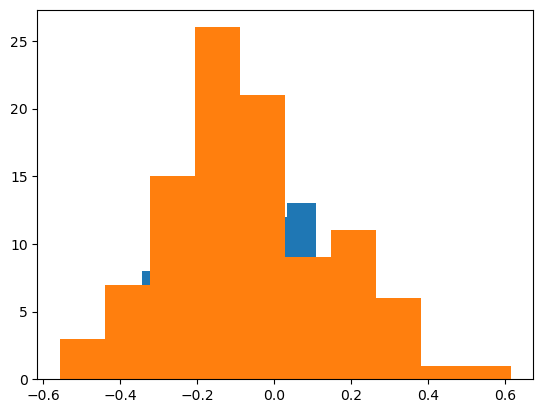

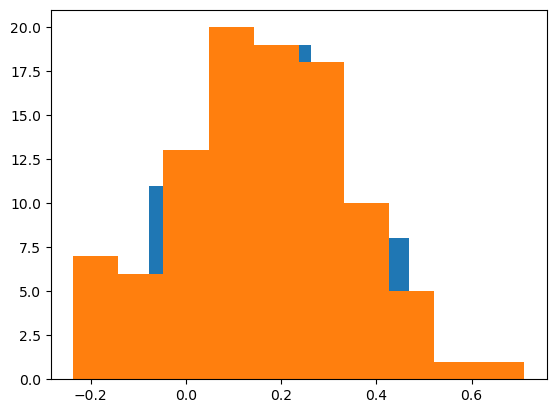

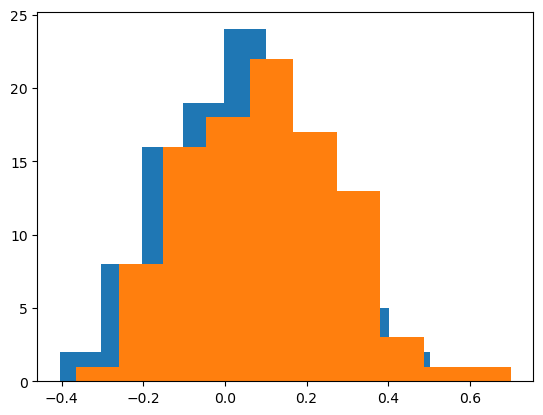

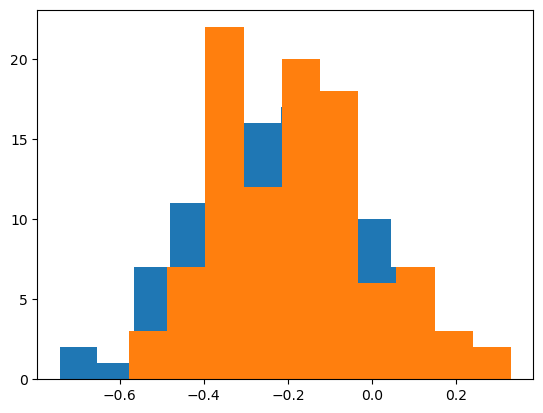

In [146]:
for i in idx_uni:
    _ = plt.hist(np.mean(g1_bootstraps_all[i,:,:], axis=1))
    _ = plt.hist(np.mean(g2_bootstraps_all[i,:,:], axis=1))
    plt.show()

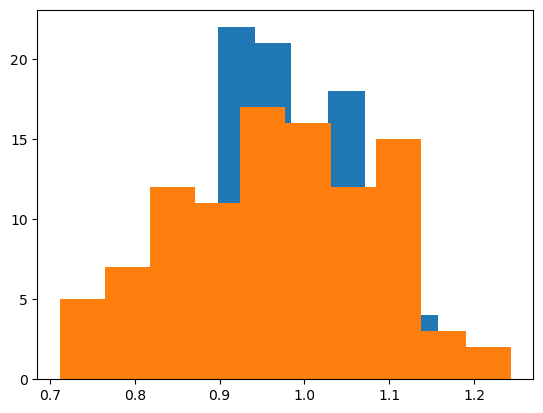

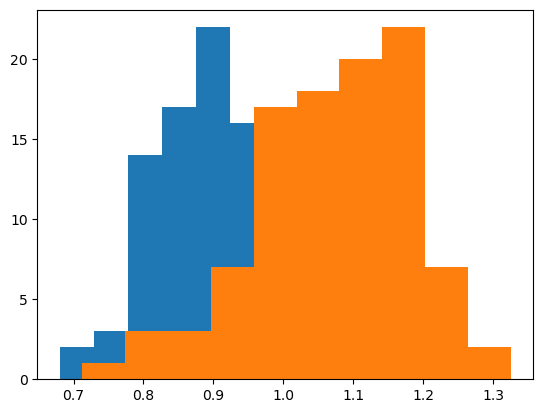

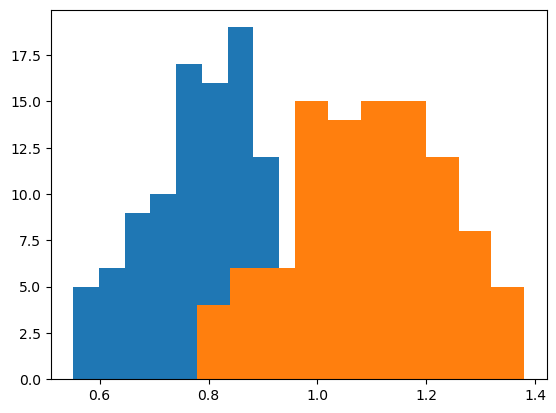

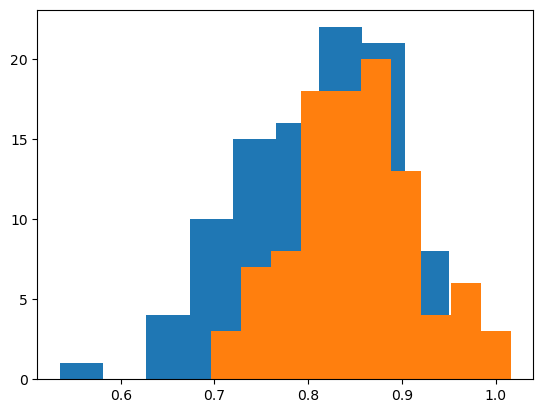

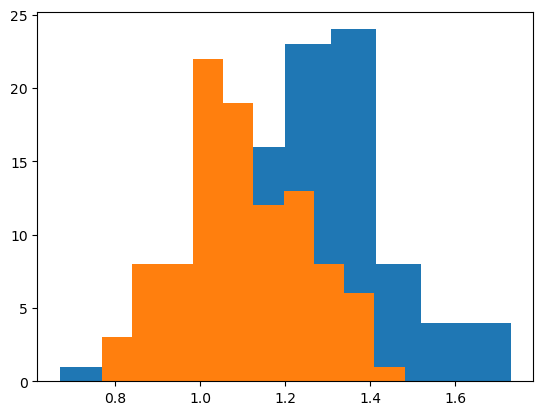

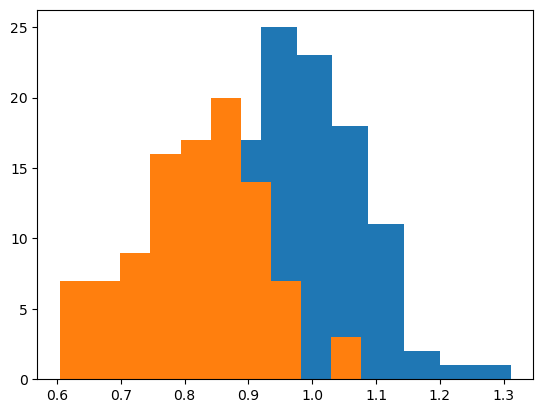

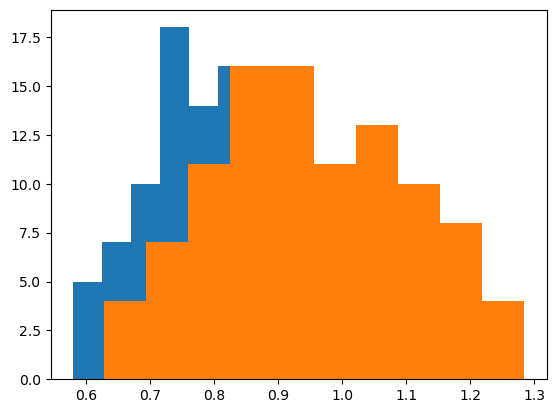

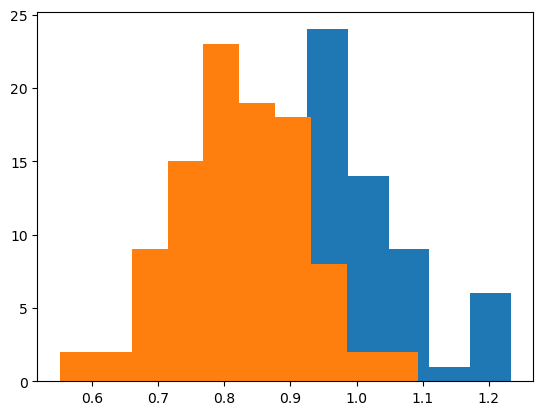

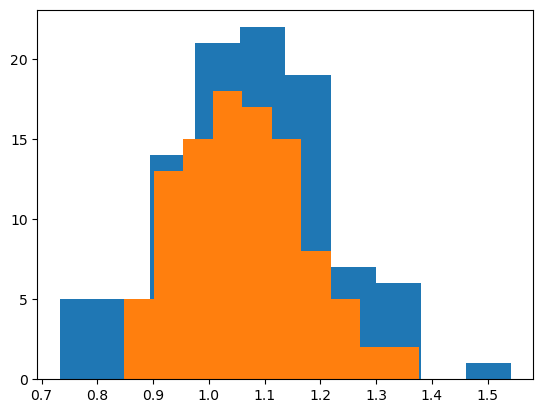

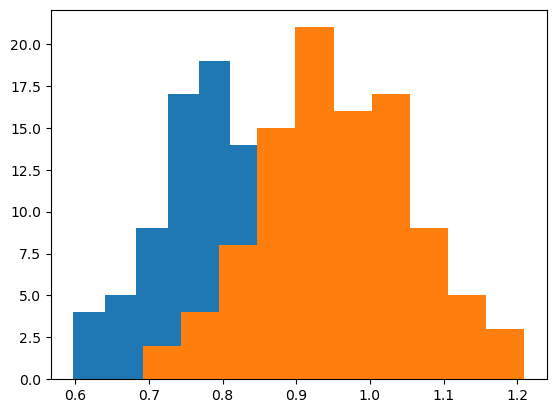

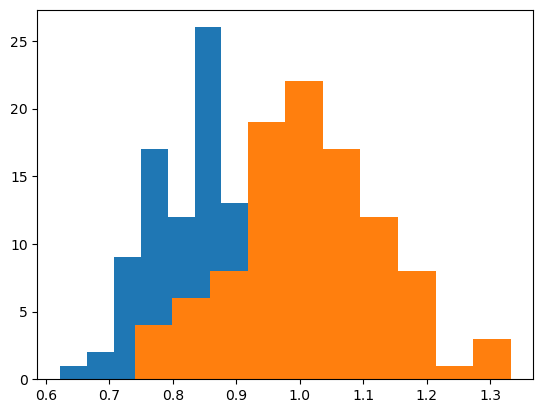

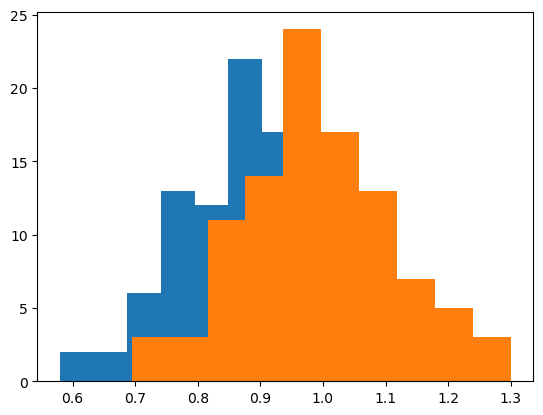

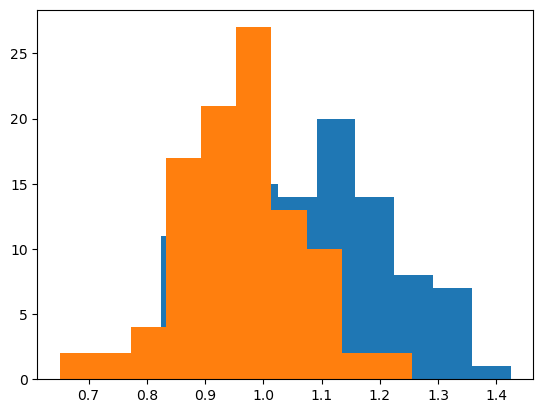

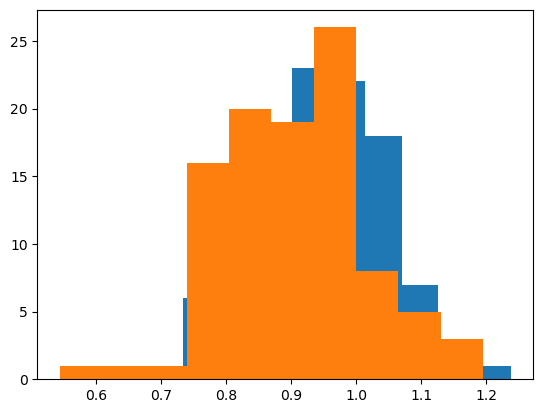

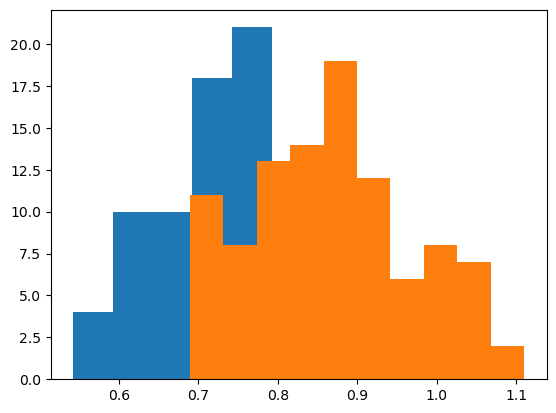

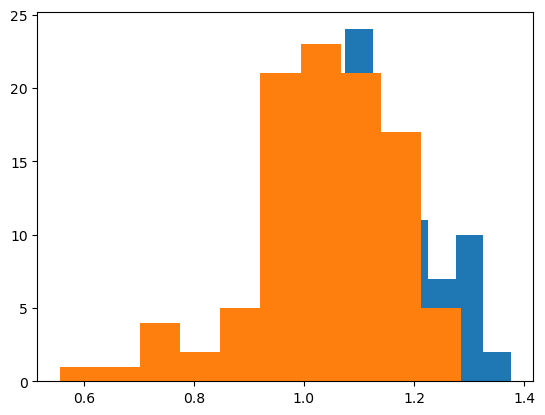

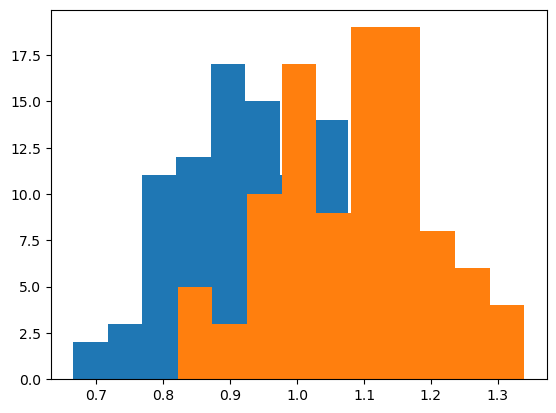

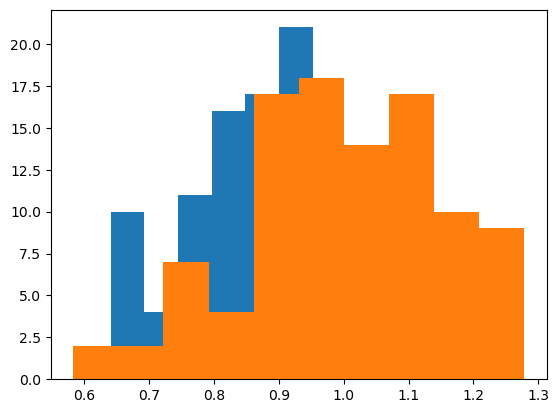

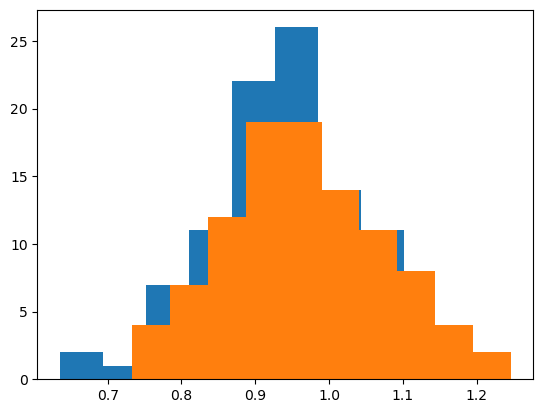

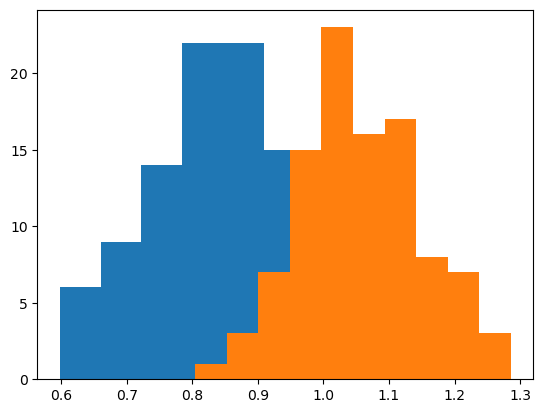

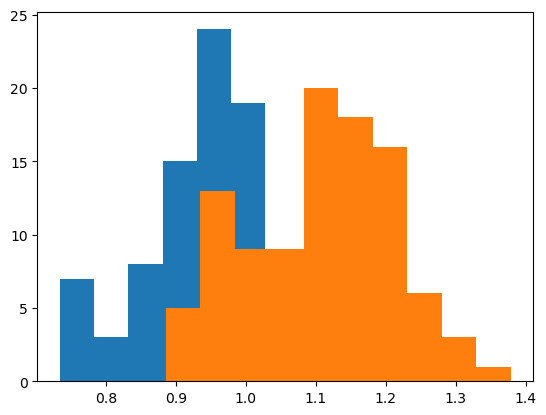

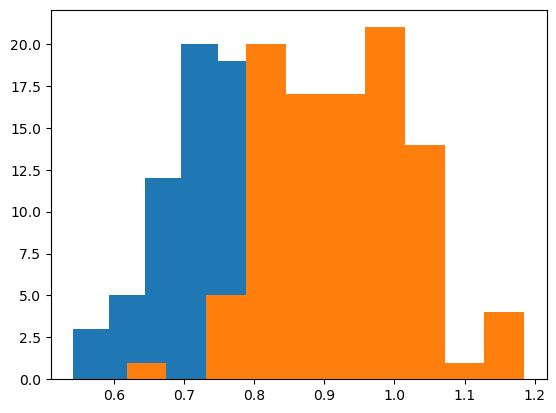

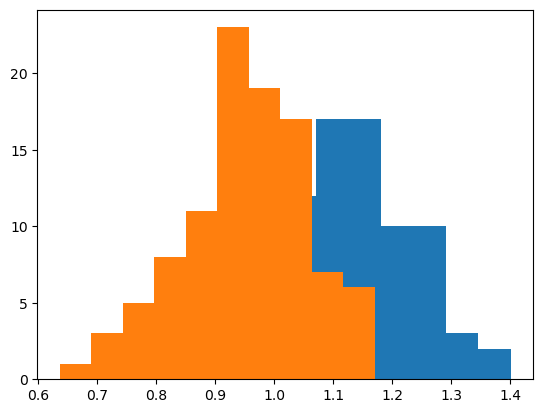

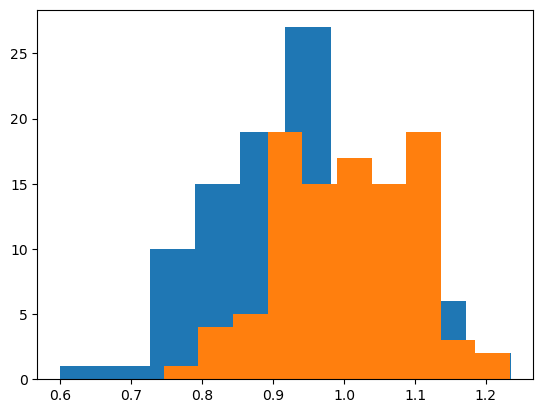

In [147]:
for i in idx_uni:
    _ = plt.hist(np.std(g1_bootstraps_all[i,:,:], axis=1))
    _ = plt.hist(np.std(g2_bootstraps_all[i,:,:], axis=1))
    plt.show()